In [1]:
import numpy as np
%matplotlib inline
import Corrfunc
import glob
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import nbodykit

import utils
import plotter
import bao_utils

%load_ext autoreload
%autoreload 2

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
textsize = 'x-large'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': textsize,
         'axes.titlesize': textsize,
         'xtick.labelsize': textsize,
         'ytick.labelsize': textsize}
pylab.rcParams.update(params)

In [2]:
ctopmany = '#33BBEE'
ctopmid = '#3547F1'
ctopfew = '#0077BB'
cspline = '#EE3377'
cbao = '#228833'
ctheory = '#808080'

base_colors = ['magenta', 'red', 'orange', 'green', 'blue']
base_names = ['a1', 'a2', 'a3', 'Bsq', 'C']

In [3]:
def plot_bases(bases):
    plt.figure()
    bases.shape
    r = bases[:,0]
    for i in range(len(bases[0])-1):
        #norm = np.mean(bases[:,i])
        base = bases[:,i+1]
        if i==0:
            base *=10
        plt.plot(r, base, color=base_colors[i], label='{}'.format(base_names[i]))
    plt.legend()

In [4]:
boxsize = 750
cat_tag = f'_L{boxsize}_n2e-4_z057_patchy'
proj = 'baoiter'
cosmo_name = 'b17'
cf_tag = f"_{proj}_cosmo{cosmo_name}_convtest"
redshift = 0.57
bias = 2.0

rmin=36.0
rmax=200.0

(-0.002, 0.015)

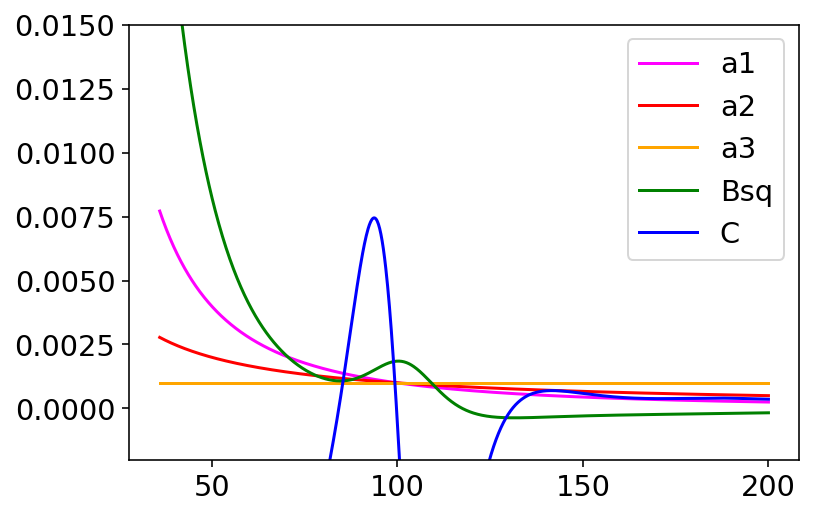

In [5]:
projfn_start = f"../tables/bases{cat_tag}{cf_tag}_r{rmin}-{rmax}_z{redshift}_bias{bias}.dat"
bases = np.loadtxt(projfn_start)
plot_bases(bases)
plt.ylim(-0.002, 0.015)

In [6]:
def load_bao(cat_tag, cf_tag, Nr):
    
    cat_dir = '../catalogs'
    result_dir = '../results/results_lognormal{}'.format(cat_tag)

    rs = []
    xis = []
    amps = []
    extras = []
    niters = []
    assert 'baoiter' in cf_tag, "baoiter not in cf_tag!"
    fn_pattern = f"cf{cf_tag}_*{cat_tag}_rlz{Nr}.npy"
    matches = glob.glob(f'{result_dir}/{fn_pattern}')
    
    for cf_fn in matches:
        r_avg, xi, amp, proj, extra_dict = np.load(cf_fn, allow_pickle=True)
    
        rs.append(r_avg)
        xis.append(xi)
        amps.append(amp)
        extras.append(extra_dict)

        fn_split = cf_fn.split('_')
        for nn in fn_split:
            if nn.startswith('niter'):
                niter = int(nn[len('niter'):])
                niters.append(niter)
    return rs, xis, amps, extras, niters

### k0 = 1

In [51]:
cat_tag = '_L750_n2e-4_z057_patchy'
cf_tag = '_baoiter_cosmob17_convtest'
Nr = 0
r_arr, xi_arr, amps_arr, extra_arr, niters = load_bao(cat_tag, cf_tag, Nr)

alpha_result=0.9852912843716168 on iteration 11


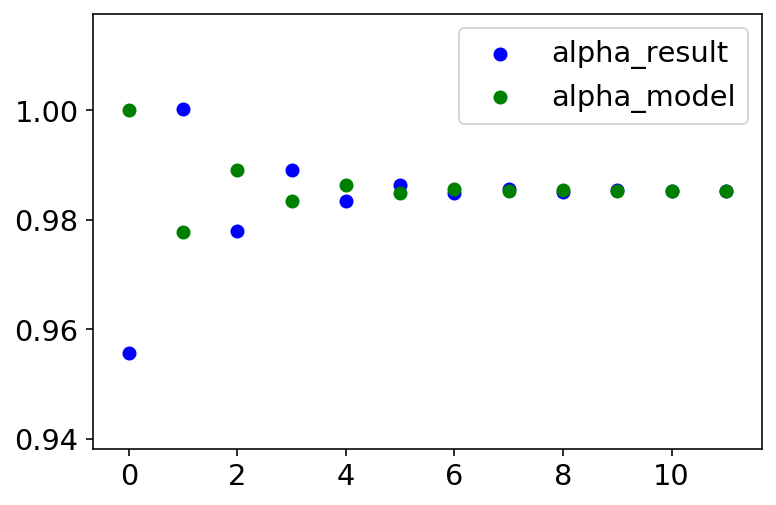

In [52]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]

print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")
plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()

### k0 = 0.1

In [53]:
cat_tag = '_L750_n2e-4_z057_patchy'
cf_tag = '_baoiter_cosmob17_convtestC0.1'
Nr = 0
r_arr, xi_arr, amps_arr, extra_arr, niters = load_bao(cat_tag, cf_tag, Nr)

alpha_result=0.9853013103399713 on iteration 13


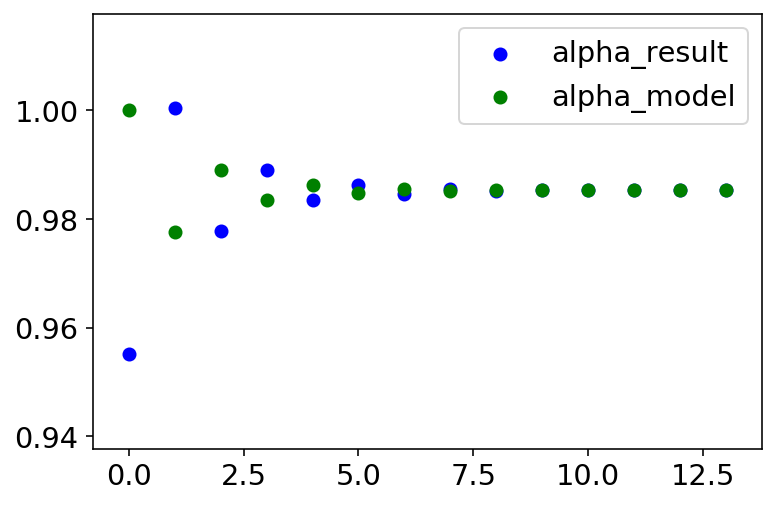

In [54]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()

### k0 = 0.01

In [55]:
cat_tag = '_L750_n2e-4_z057_patchy'
cf_tag = '_baoiter_cosmob17_convtestC0.01'
Nr = 0
r_arr, xi_arr, amps_arr, extra_arr, niters = load_bao(cat_tag, cf_tag, Nr)

alpha_result=0.9852108575930417 on iteration 39


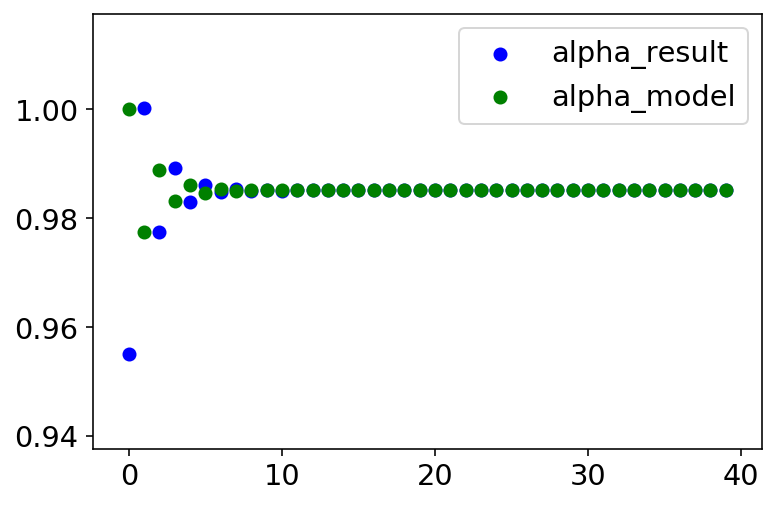

In [56]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()

(0.9847, 0.9857)

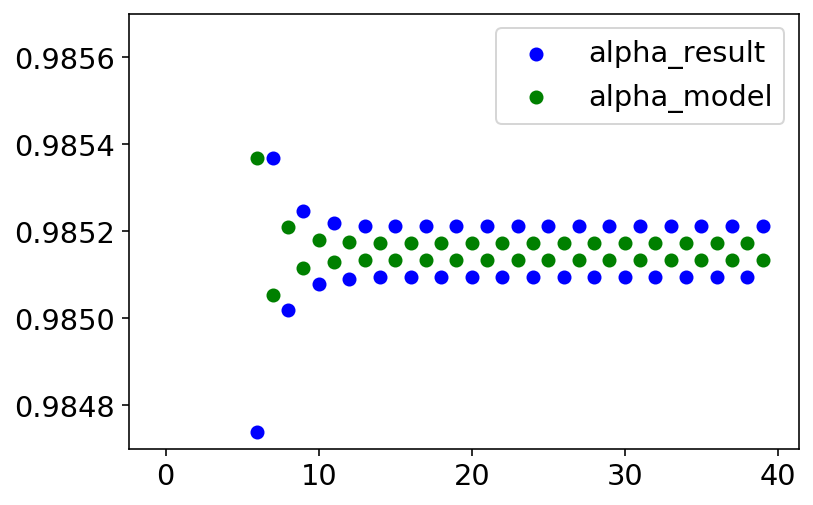

In [57]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()
plt.ylim(0.9847,0.9857)

## Test convergence thresh

Ok, let's take k0 = 0.1. Let's see how the convergence threshold changes things.

In [60]:
cat_tag = '_L750_n2e-4_z057_patchy'
cf_tag = '_baoiter_cosmob17_convtestC0.1thresh1e-6'
Nr = 0
r_arr, xi_arr, amps_arr, extra_arr, niters = load_bao(cat_tag, cf_tag, Nr)

alpha_result=0.985298951251961 on iteration 16


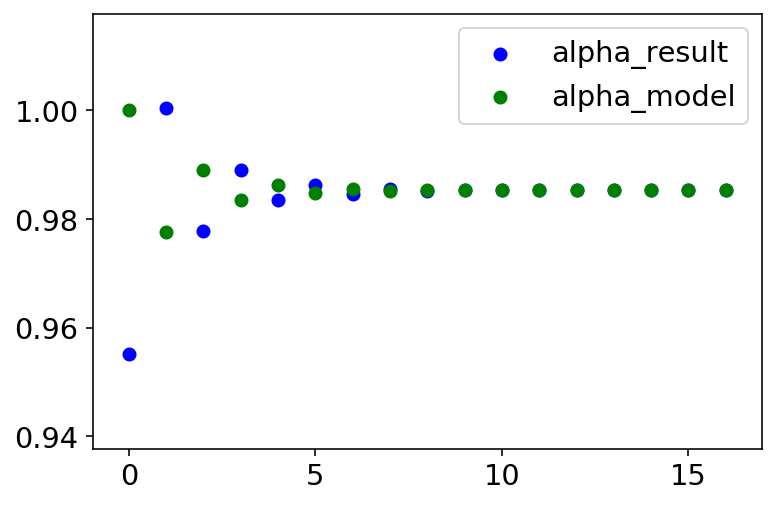

In [61]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()

Cool this level of precision seems good for a 4 decimal truth.

### dalpha tests

dalpha = 0.001 (was 0.01 before!)

In [75]:
boxsize = 750
cat_tag = f'_L{boxsize}_n2e-4_z057_patchy'
cf_tag = '_baoiter_cosmob17_convtestC0.1thresh1e-6'
redshift = 0.57
bias = 2.0

rmin=36.0
rmax=200.0

(-0.002, 0.015)

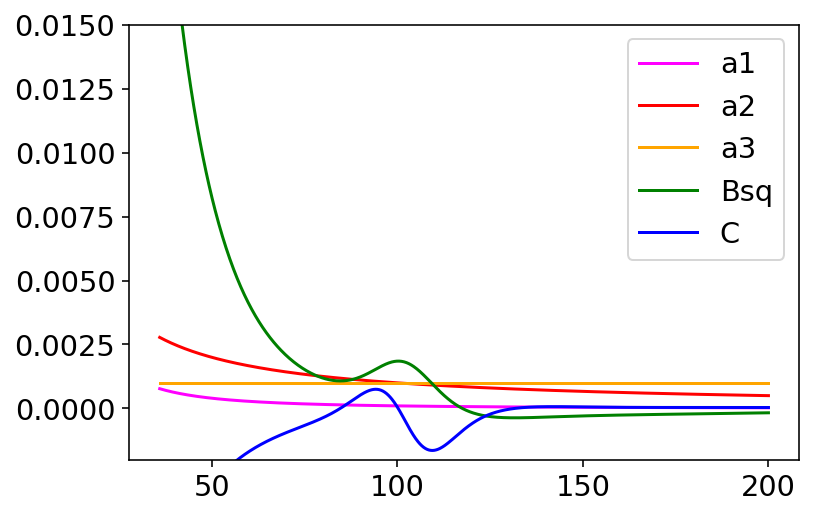

In [79]:
projfn_start = f"../tables/bases{cat_tag}{cf_tag}_r{rmin}-{rmax}_z{redshift}_bias{bias}.dat"
bases = np.loadtxt(projfn_start)
plot_bases(bases)
plt.ylim(-0.002, 0.015)

In [77]:
boxsize = 750
cat_tag = f'_L{boxsize}_n2e-4_z057_patchy'
cf_tag = '_baoiter_cosmob17_convtestC0.1thresh1e-6dalpha0.001'
redshift = 0.57
bias = 2.0

rmin=36.0
rmax=200.0

(-0.002, 0.015)

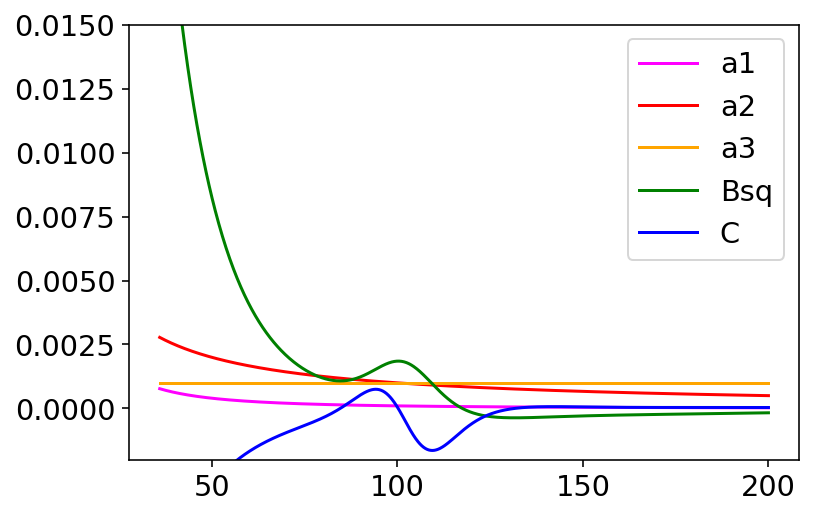

In [80]:
projfn_start = f"../tables/bases{cat_tag}{cf_tag}_r{rmin}-{rmax}_z{redshift}_bias{bias}.dat"
bases = np.loadtxt(projfn_start)
plot_bases(bases)
plt.ylim(-0.002, 0.015)

The C functions in the above two plots are slightly different, but very similar, because as you approach the limit the dalpha shouldnt matter for the finite diff.

In [81]:
cat_tag = '_L750_n2e-4_z057_patchy'
cf_tag = '_baoiter_cosmob17_convtestC0.1thresh1e-6dalpha0.001'
Nr = 0
r_arr, xi_arr, amps_arr, extra_arr, niters = load_bao(cat_tag, cf_tag, Nr)

alpha_result=0.9846893791812592 on iteration 39


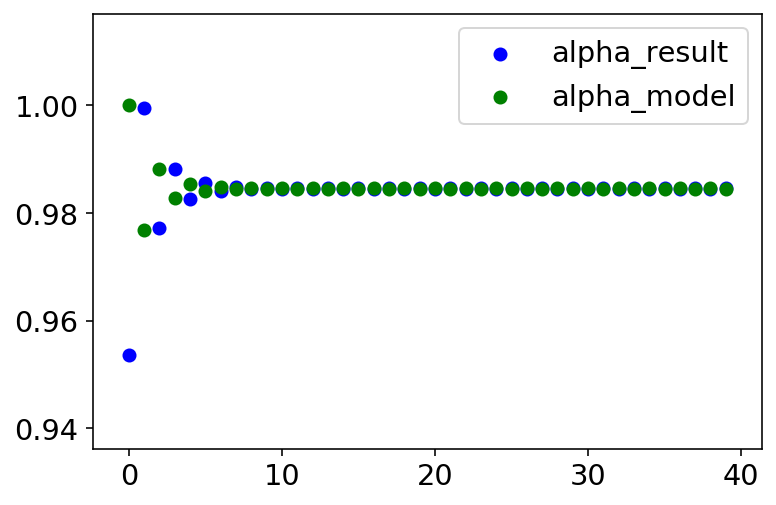

In [82]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()

Oh no we got caught in a loop again!

Let's try 0.003. 

In [83]:
cat_tag = '_L750_n2e-4_z057_patchy'
cf_tag = '_baoiter_cosmob17_convtestC0.1thresh1e-6dalpha0.003'
Nr = 0
r_arr, xi_arr, amps_arr, extra_arr, niters = load_bao(cat_tag, cf_tag, Nr)

alpha_result=0.9846988298783315 on iteration 16


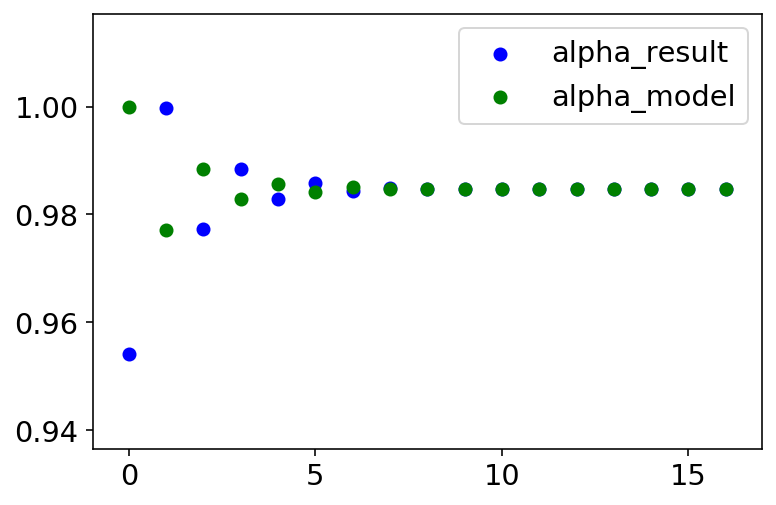

In [84]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()

Huh, we converged in the same number of steps, and our result is different at the 0.05% level (0.9846988298783315 vs 0.985298951251961).

What about larger dalpha? dalpha = 0.03:

In [85]:
cat_tag = '_L750_n2e-4_z057_patchy'
cf_tag = '_baoiter_cosmob17_convtestC0.1thresh1e-6dalpha0.03'
Nr = 0
r_arr, xi_arr, amps_arr, extra_arr, niters = load_bao(cat_tag, cf_tag, Nr)

alpha_result=0.9869509506287583 on iteration 20


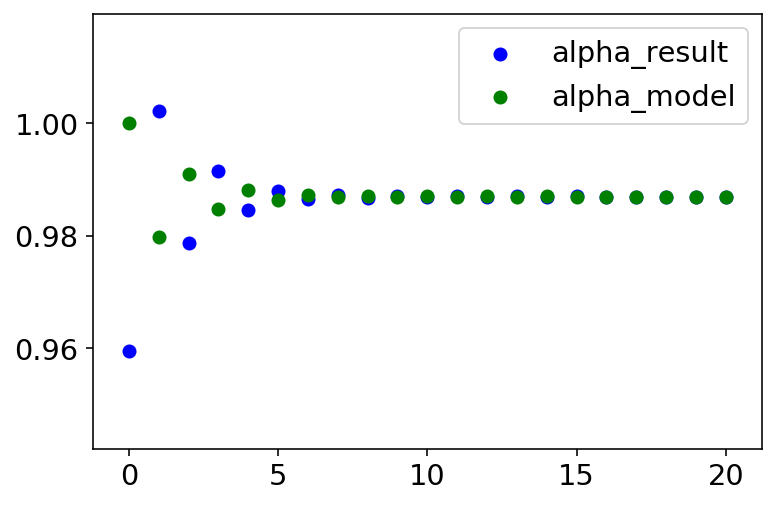

In [86]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()

Took a few steps longer to converge, and now we are different by >0.1%. (0.9869509506287583)

Let's go back to small dalpha (dalpha=0.001), and reduce eta to try to break the loop:

In [87]:
cat_tag = '_L750_n2e-4_z057_patchy'
cf_tag = '_baoiter_cosmob17_convtestC0.1thresh1e-6dalpha0.001eta0.3'
Nr = 0
r_arr, xi_arr, amps_arr, extra_arr, niters = load_bao(cat_tag, cf_tag, Nr)

alpha_result=0.9845644532158114 on iteration 5


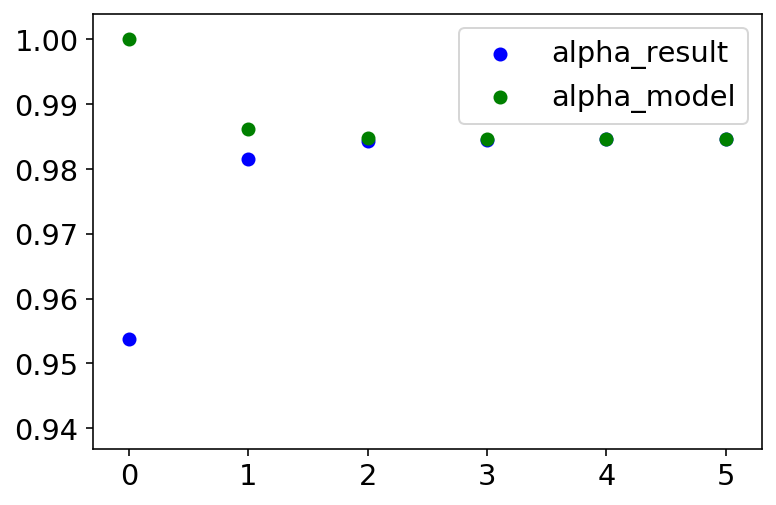

In [88]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()

Super speedy convergence! result is very close to the dalpha=0.003, eta=0.5 result.

What if we keep reducing dalpha? dalpha=0.0003:

In [91]:
cat_tag = '_L750_n2e-4_z057_patchy'
cf_tag = '_baoiter_cosmob17_convtestC0.1thresh1e-6dalpha0.0003eta0.3'
Nr = 0
r_arr, xi_arr, amps_arr, extra_arr, niters = load_bao(cat_tag, cf_tag, Nr)

alpha_result=0.9845014243835706 on iteration 7


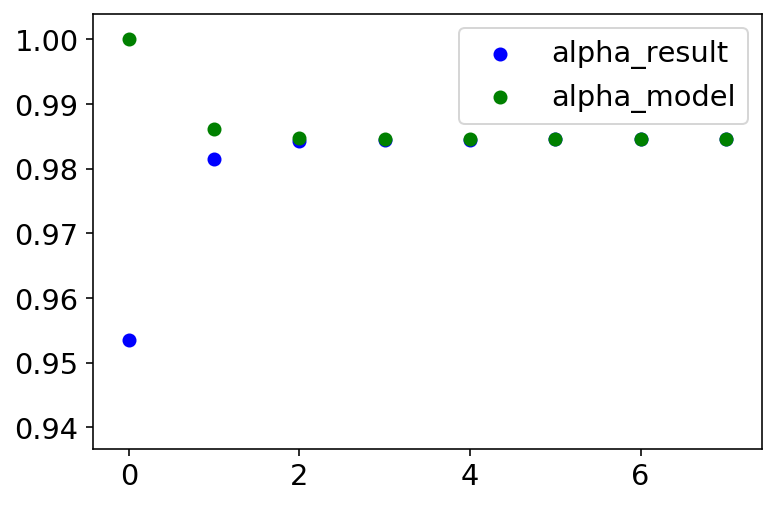

In [92]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()

This is much more stable, changing at the <0.01% level. still not as good as convergence threshold tho. (0.9845014243835706 vs 0.9845644532158114) 

Let's reduce dalpha one more time, to 0.0001:

In [93]:
cat_tag = '_L750_n2e-4_z057_patchy'
cf_tag = '_baoiter_cosmob17_convtestC0.1thresh1e-6dalpha0.0001eta0.3'
Nr = 0
r_arr, xi_arr, amps_arr, extra_arr, niters = load_bao(cat_tag, cf_tag, Nr)

alpha_result=0.9845398016624926 on iteration 7


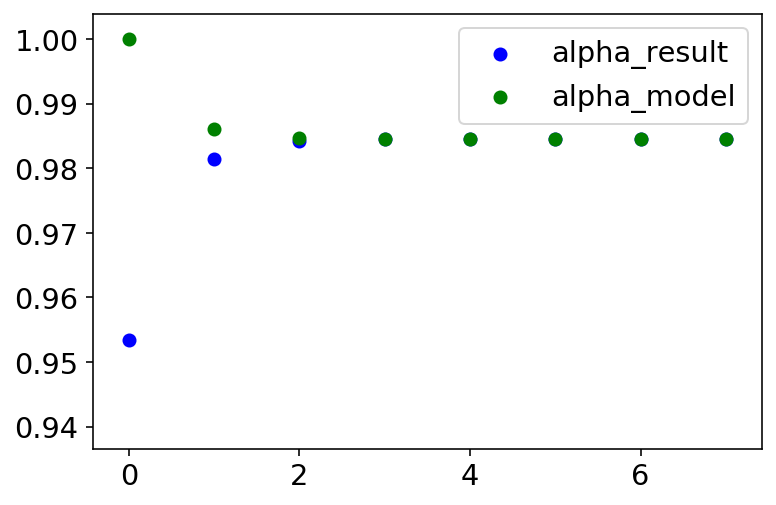

In [94]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()

Similar again! Ok so i think we can use biggest of these where it's not changing, dalpha=0.0001.

Let's go back and try k0=1.0 for fun (with dalpha=0.001):

In [95]:
cat_tag = '_L750_n2e-4_z057_patchy'
cf_tag = '_baoiter_cosmob17_convtestC1.0thresh1e-6dalpha0.001eta0.3'
Nr = 0
r_arr, xi_arr, amps_arr, extra_arr, niters = load_bao(cat_tag, cf_tag, Nr)

alpha_result=0.9846024550408025 on iteration 6


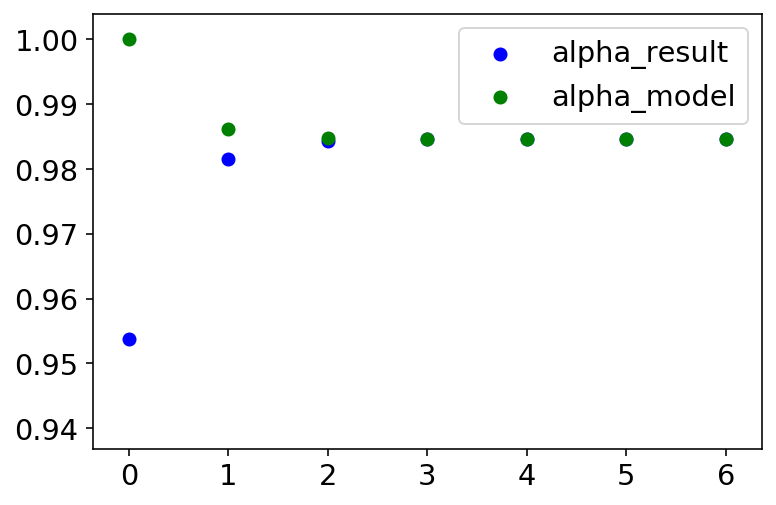

In [96]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()

Also chill! But maybe we should stick with k=0.1.

## k=0.1, dalpha=0.001, eta=0.3, thresh=1e-6

In [104]:
cosmo_b17 = bao_utils.get_cosmo('b17')
cosmo_patchy = bao_utils.get_cosmo('patchy')

z = 0.57
alpha_true = bao_utils.compute_alpha(z, cosmo_patchy, cosmo_b17) 

0.260448 0.31000013381653335 0.04814257203879415 0.676 0.96 [0.06] 0.824 2.0328
0.258909 0.307115 0.048206 0.6777 0.9611 [] 0.8288000000000002 3.046
0.307115 0.258909 0.048206 0.6777
0.31000013381653335 0.260448 0.04814257203879415 0.676
Truth: r_s: 151.67742739223243 D_A: 1386.2717028870238 Mpc H: 92.96723916119726 km / (Mpc s)
Fiducial: r_s: 151.63251902228856 D_A: 1388.2262919973946 Mpc H: 92.93687764109468 km / (Mpc s)
rs_truth_col 150.53793048861854 rs_fid_col 150.51468231796673
alpha: 0.998656590432877
alpha_col: 0.998798086203619


In [218]:
cat_tag = '_L750_n2e-4_z057_patchy'
cf_tag = '_baoiter_cosmob17_newconv'
alphas = bao_utils.get_alphas(cat_tag, cf_tag, realizations=range(65))
print(np.nanmean(alphas), np.nanmedian(alphas), np.nanstd(alphas))

Found 51 converged BAO cfs (14 not converged)
alpha_mean: 0.9998164101652757
alpha_median: 0.999443185891675
alpha_std: 0.028104609908120214
0.9998164101652757 0.999443185891675 0.028104609908120214


Text(0, 0.5, '#')

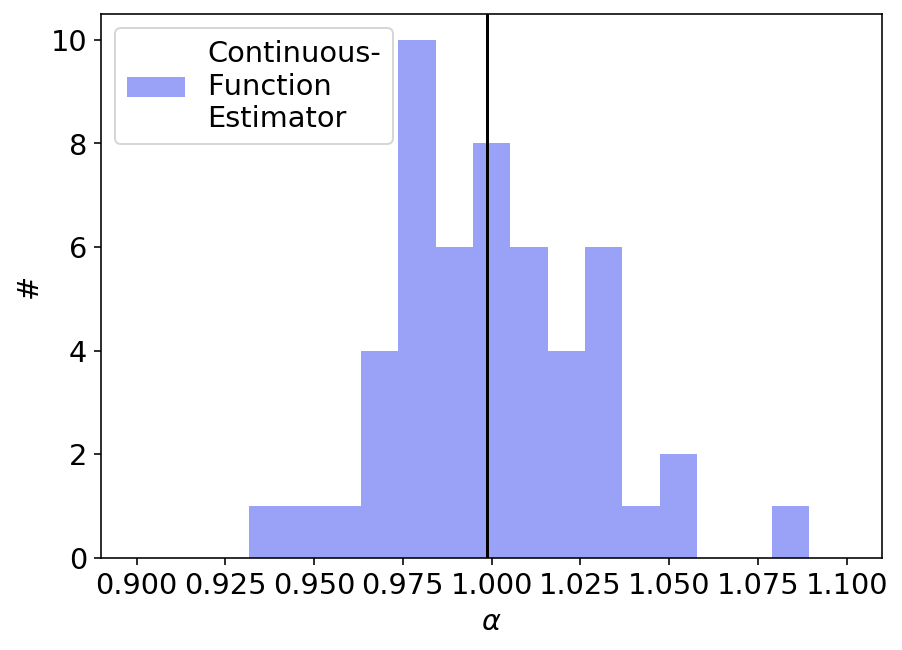

In [219]:
#bins = np.linspace(0.6, 1.4, 30)
bins = np.linspace(0.9, 1.1, 20)
plt.figure(figsize=(7,5))
plt.hist(alphas, bins=bins, color=ctopmid, alpha=0.5, label='Continuous-\nFunction\nEstimator')
#plt.hist(alphas_standard, bins=bins, color=ctheory, alpha=0.5, label='L-S with\nStandard\nBAO Fitting')
plt.axvline(alpha_true, color='black')
plt.legend(loc='upper left')
plt.xlabel(r"$\alpha$")
plt.ylabel('#')

Let's check out the unconverged ones here:

In [220]:
print(np.where(np.isnan(alphas)))

(array([ 4,  6, 11, 15, 26, 28, 31, 33, 37, 39, 43, 48, 55, 62]),)


In [233]:
cat_tag = '_L750_n2e-4_z057_patchy'
cf_tag = '_baoiter_cosmob17_newconv'
Nr = 4
r_arr, xi_arr, amps_arr, extra_arr, niters = load_bao(cat_tag, cf_tag, Nr)

alpha_result=0.9866611206397403 on iteration 19


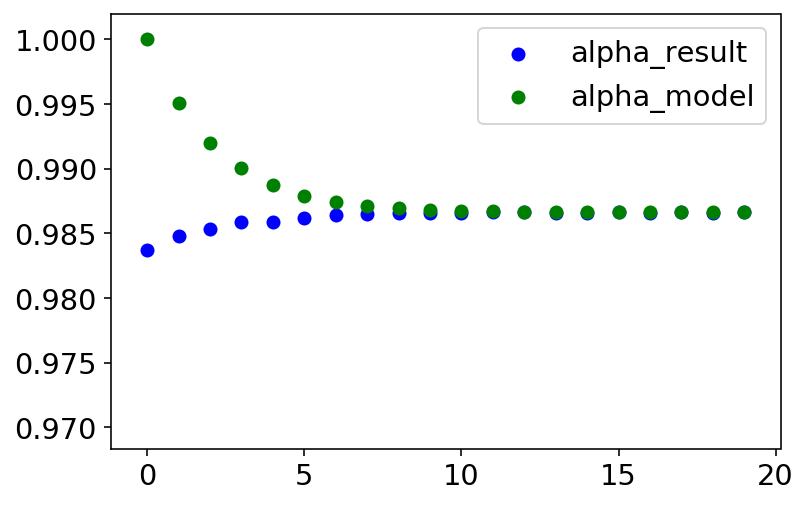

In [234]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()

alpha_result=0.9866611206397403 on iteration 19


(0.986, 0.987)

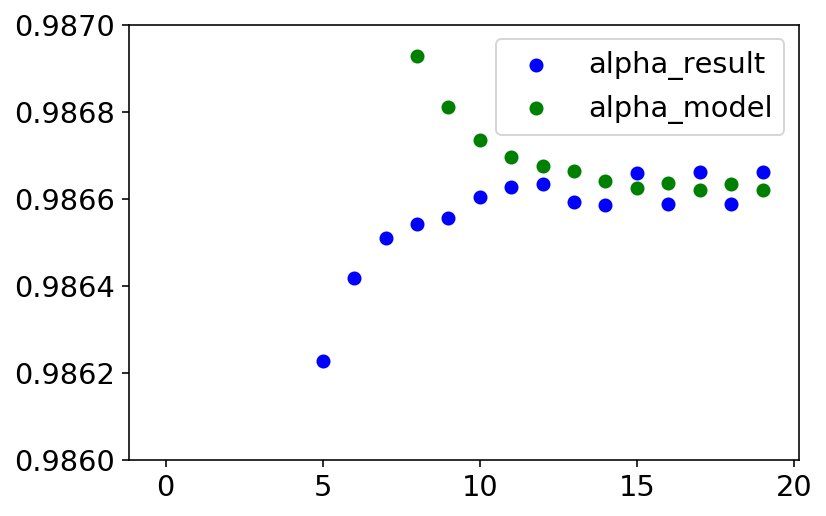

In [121]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()
plt.ylim(0.986, 0.987)

Caught in a loop again! Suppose we're back to manually reducing eta. Or i could build in a condition to catch these...

In [ ]:
### Check amps

In [237]:
cat_tag = '_L750_n2e-4_z057_patchy'
cf_tag = '_baoiter_cosmob17_newconv'
Nr = 0
r_arr, xi_arr, amps_arr, extra_arr, niters = load_bao(cat_tag, cf_tag, Nr)
print(amps_arr)

[array([-90.00420957,  12.69763551,  -4.51924648,   3.35693458,
        -0.46303731]), array([-9.21655980e+01,  1.29398325e+01, -4.58184456e+00,  3.38488618e+00,
       -4.51939512e-02]), array([-9.21865410e+01,  1.29406585e+01, -4.58189699e+00,  3.38369079e+00,
       -4.90645783e-03]), array([-9.22019834e+01,  1.29420926e+01, -4.58222983e+00,  3.38360257e+00,
       -1.36893100e-03]), array([-9.22022489e+01,  1.29421142e+01, -4.58223437e+00,  3.38359927e+00,
       -8.60572405e-06]), array([-9.22022547e+01,  1.29421146e+01, -4.58223444e+00,  3.38359910e+00,
       -8.90399700e-07])]


alpha_result=0.9845644532155544 on iteration 5


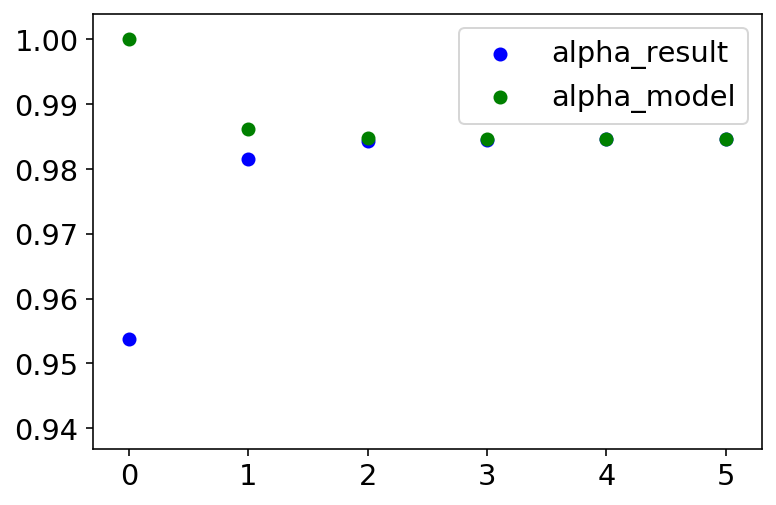

In [236]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()

## 5e-5 mocks - for checking many fast!

In [157]:
cat_tag = '_L750_n5e-5_z057_patchy'
cf_tag = '_baoiter_cosmob17_newconv'
alphas = bao_utils.get_alphas(cat_tag, cf_tag, realizations=range(30))
print(np.nanmean(alphas), np.nanmedian(alphas), np.nanstd(alphas))

Found 19 converged BAO cfs (11 not converged)
alpha_mean: 0.9829163494615422
alpha_median: 0.9944052335375904
alpha_std: 0.03663887599412616
0.9829163494615422 0.9944052335375904 0.03663887599412616


In [158]:
print(np.where(np.isnan(alphas)))

(array([ 1,  4,  5, 11, 12, 15, 16, 17, 21, 24, 25]),)


Text(0, 0.5, '#')

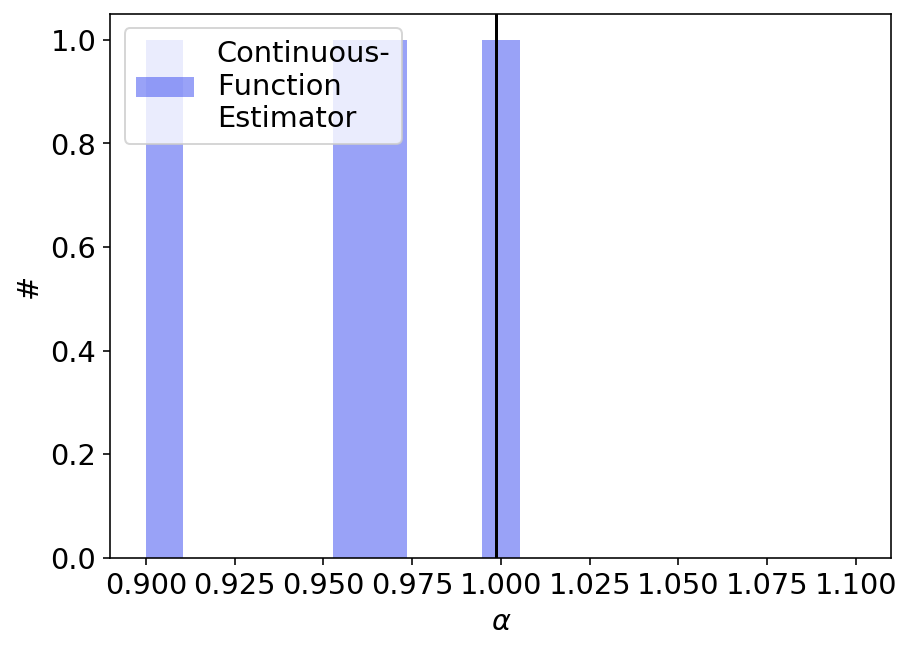

In [127]:
#bins = np.linspace(0.6, 1.4, 30)
bins = np.linspace(0.9, 1.1, 20)
plt.figure(figsize=(7,5))
plt.hist(alphas, bins=bins, color=ctopmid, alpha=0.5, label='Continuous-\nFunction\nEstimator')
#plt.hist(alphas_standard, bins=bins, color=ctheory, alpha=0.5, label='L-S with\nStandard\nBAO Fitting')
plt.axvline(alpha_true, color='black')
plt.legend(loc='upper left')
plt.xlabel(r"$\alpha$")
plt.ylabel('#')

In [128]:
cat_tag = '_L750_n5e-5_z057_patchy'
cf_tag = '_baoiter_cosmob17_newconv'
Nr = 1
r_arr, xi_arr, amps_arr, extra_arr, niters = load_bao(cat_tag, cf_tag, Nr)

alpha_result=1.0334982922001 on iteration 19


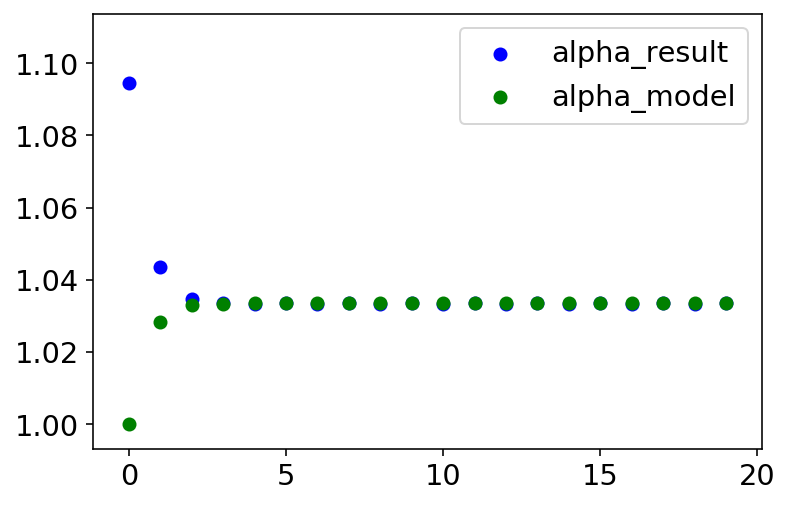

In [129]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()

alpha_result=1.0334982922001 on iteration 19


(1.032, 1.035)

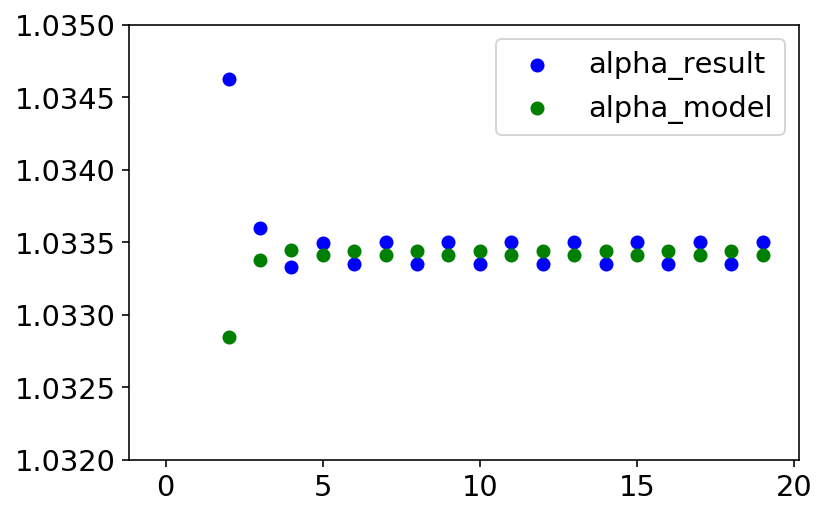

In [136]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()
plt.ylim(1.032,1.035)

Let's try eta=1, maybe the small etas arent doing anything...

In [174]:
cat_tag = '_L750_n5e-5_z057_patchy'
cf_tag = '_baoiter_cosmob17_newconveta1'
alphas = bao_utils.get_alphas(cat_tag, cf_tag, realizations=range(30))
print(np.nanmean(alphas), np.nanmedian(alphas), np.nanstd(alphas))

Found 3 converged BAO cfs (27 not converged)
alpha_mean: 0.8688269099725502
alpha_median: 0.8962330565744266
alpha_std: 0.14437435403054277
0.8688269099725502 0.8962330565744266 0.14437435403054277


In [175]:
print(np.where(np.isnan(alphas)))

(array([ 1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),)


In [176]:
cat_tag = '_L750_n5e-5_z057_patchy'
cf_tag = '_baoiter_cosmob17_newconveta1'
Nr = 21
r_arr, xi_arr, amps_arr, extra_arr, niters = load_bao(cat_tag, cf_tag, Nr)

alpha_result=0.926693429607956 on iteration 19


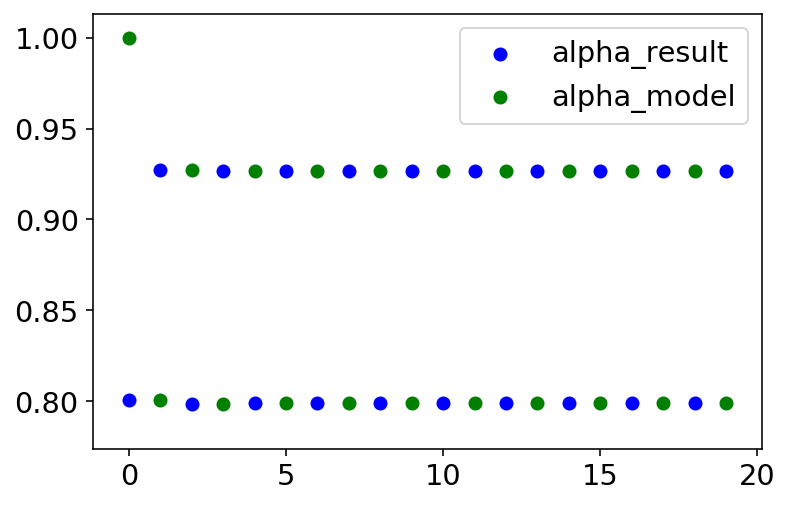

In [177]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()

Ok that's real bad... so strange

## Let's be more clever. midpoint method!

In [198]:
cat_tag = '_L750_n5e-5_z057_patchy'
cf_tag = '_baoiter_cosmob17_newconvmid'
alphas = bao_utils.get_alphas(cat_tag, cf_tag, realizations=range(30))
print(np.nanmean(alphas), np.nanmedian(alphas), np.nanstd(alphas))

Found 3 converged BAO cfs (27 not converged)
alpha_mean: 0.868826933922454
alpha_median: 0.8962330565744283
alpha_std: 0.14437438082465973
0.868826933922454 0.8962330565744283 0.14437438082465973


In [172]:
cat_tag = '_L750_n5e-5_z057_patchy'
cf_tag = '_baoiter_cosmob17_newconvmid'
Nr = 2
r_arr, xi_arr, amps_arr, extra_arr, niters = load_bao(cat_tag, cf_tag, Nr)

alpha_result=0.9992239431588689 on iteration 19


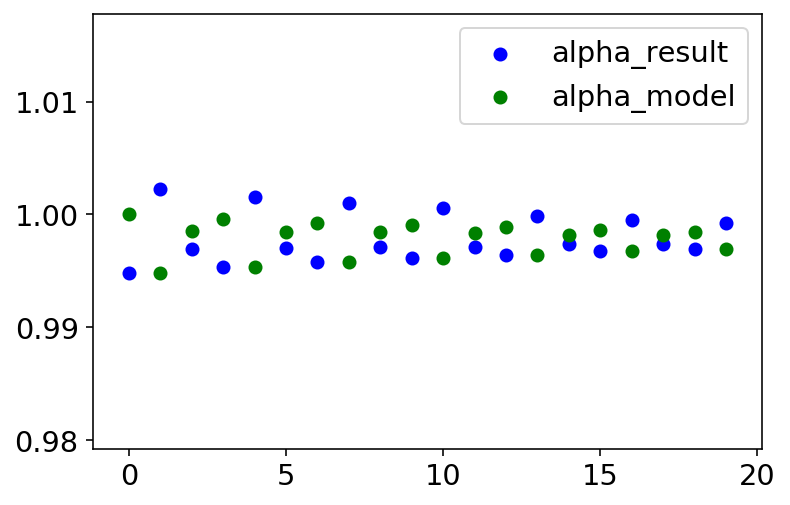

In [173]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()

Alright, lots of cool patterns here. how about also having eta be a bit smaller?

In [199]:
cat_tag = '_L750_n5e-5_z057_patchy'
cf_tag = '_baoiter_cosmob17_newconvmideta0.5'
alphas = bao_utils.get_alphas(cat_tag, cf_tag, realizations=range(30))
print(np.nanmean(alphas), np.nanmedian(alphas), np.nanstd(alphas))

Found 5 converged BAO cfs (25 not converged)
alpha_mean: 0.9964725486025741
alpha_median: 1.0183381477660494
alpha_std: 0.05104221341304511
0.9964725486025741 1.0183381477660494 0.05104221341304511


In [192]:
cat_tag = '_L750_n5e-5_z057_patchy'
cf_tag = '_baoiter_cosmob17_newconvmideta0.5'
Nr = 2
r_arr, xi_arr, amps_arr, extra_arr, niters = load_bao(cat_tag, cf_tag, Nr)

alpha_result=0.9978050675774766 on iteration 19


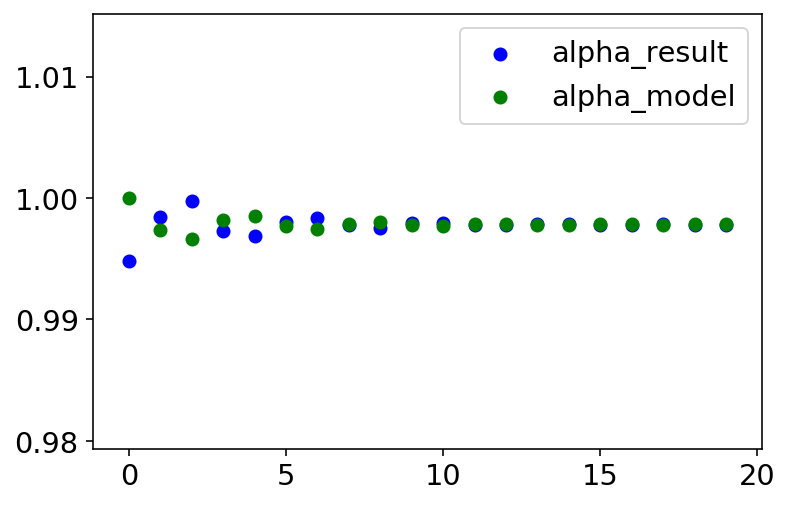

In [193]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()

[0.9947876884297158, 0.9984232408321988, 0.9997596990607276, 0.9972893867929803, 0.9968965070647705, 0.9980153685904516, 0.9983168936422986, 0.9977570170890135, 0.9975242261884335, 0.9979408690982522, 0.9979841149836326, 0.9977968951641644, 0.997751209840887, 0.997879630620403, 0.9978944260701693, 0.9978017340055862, 0.9978114493711193, 0.9979038119324383, 0.9978013383742551, 0.9978050675774766]
alpha_result=0.9978050675774766 on iteration 19


(0.997, 0.999)

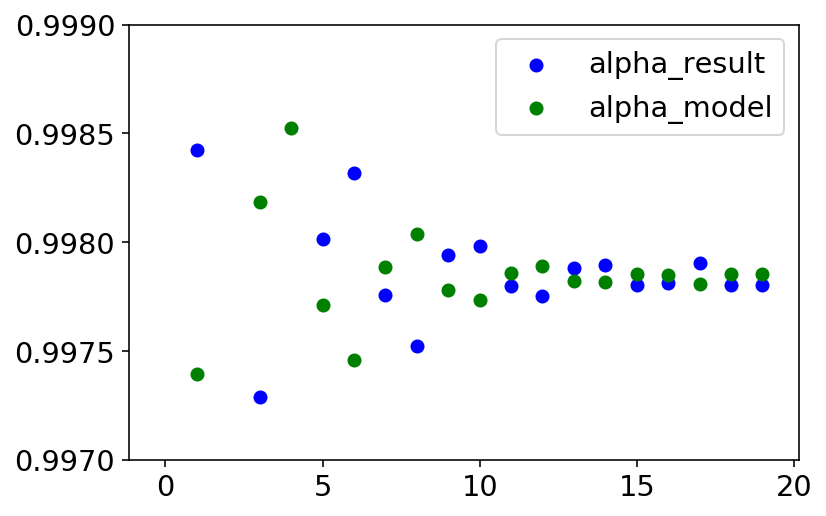

In [197]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(alpha_results)
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()
plt.ylim(0.997, 0.999)

Alright, forget midpoints. Let's try with the same condition, the error switching sign, but if that happens just cut eta in half:

In [210]:
cat_tag = '_L750_n5e-5_z057_patchy'
cf_tag = '_baoiter_cosmob17_newconvetaadapt'
alphas = bao_utils.get_alphas(cat_tag, cf_tag, realizations=range(30))
print(np.nanmean(alphas), np.nanmedian(alphas), np.nanstd(alphas))

Found 0 converged BAO cfs (30 not converged)
alpha_mean: nan
alpha_median: nan
alpha_std: nan
nan nan nan


/home/users/ksf293/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


In [211]:
cat_tag = '_L750_n5e-5_z057_patchy'
cf_tag = '_baoiter_cosmob17_newconvetaadapt'
Nr = 0
r_arr, xi_arr, amps_arr, extra_arr, niters = load_bao(cat_tag, cf_tag, Nr)

alpha_result=0.9728860230055422 on iteration 19


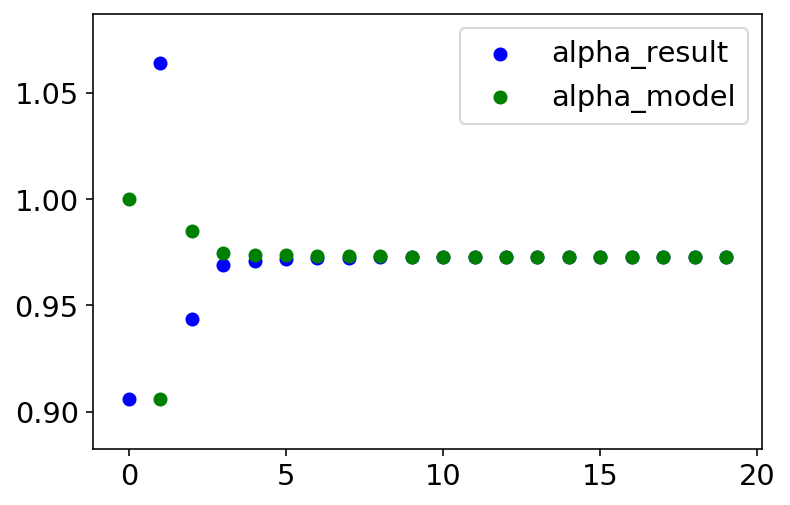

In [204]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()

alpha_result=0.9728860230055422 on iteration 19


(0.9727, 0.9731)

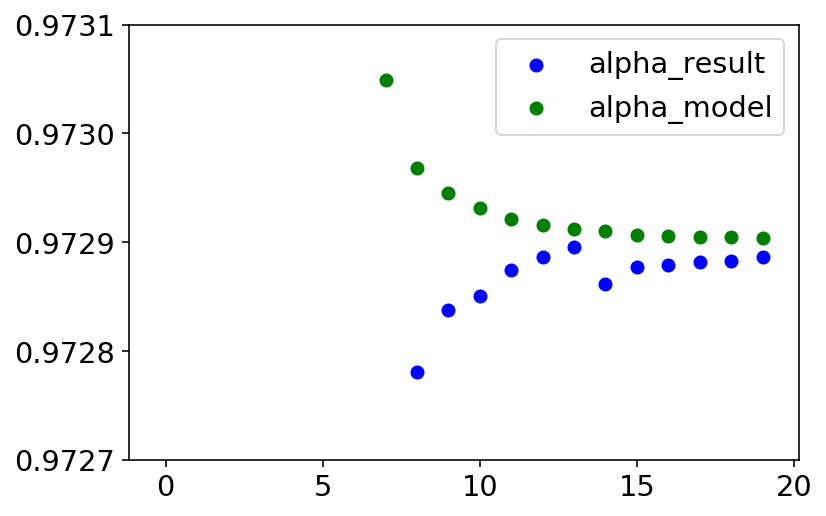

In [209]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()
plt.ylim(0.9727,0.9731)

In [212]:
cat_tag = '_L750_n5e-5_z057_patchy'
cf_tag = '_baoiter_cosmob17_newconvetaadapt'
Nr = 1
r_arr, xi_arr, amps_arr, extra_arr, niters = load_bao(cat_tag, cf_tag, Nr)

alpha_result=1.043893518592296 on iteration 19


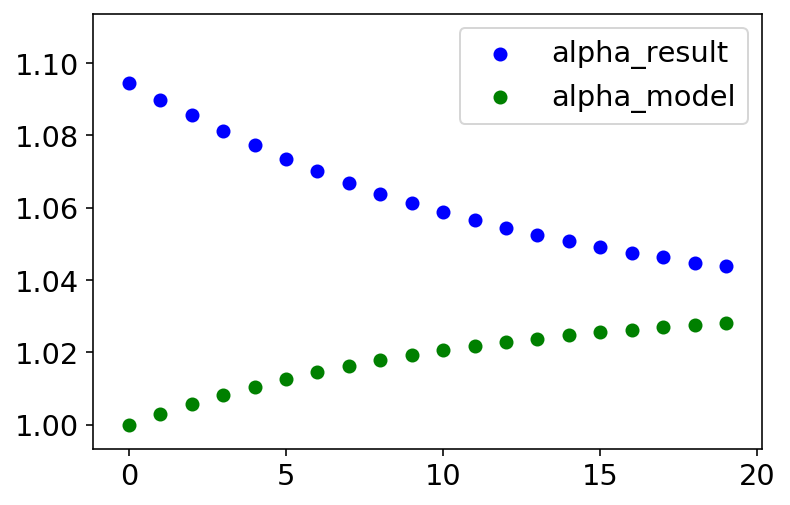

In [213]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()

In [255]:
cat_tag = '_L750_n5e-5_z057_patchy'
cf_tag = '_baoiter_cosmob17_newconvetaadapt0.9'
Nr = 1
r_arr, xi_arr, amps_arr, extra_arr, niters = load_bao(cat_tag, cf_tag, Nr)

alpha_result=1.0334560960959838 on iteration 18


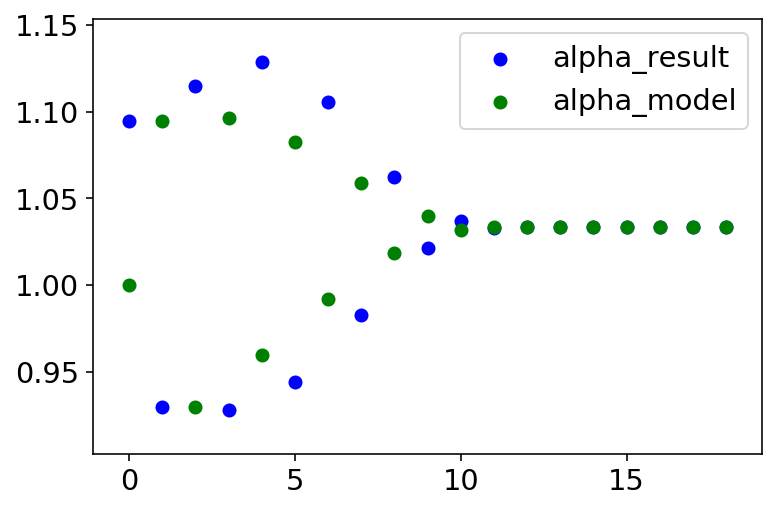

In [256]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()

Ok this is good, but let's start at eta=0.5 to try to converge faster:

In [259]:
cat_tag = '_L750_n5e-5_z057_patchy'
cf_tag = '_baoiter_cosmob17_newconvetaadapt0.9s'
Nr = 0
r_arr, xi_arr, amps_arr, extra_arr, niters = load_bao(cat_tag, cf_tag, Nr)

alpha_result=0.97312047914784 on iteration 11


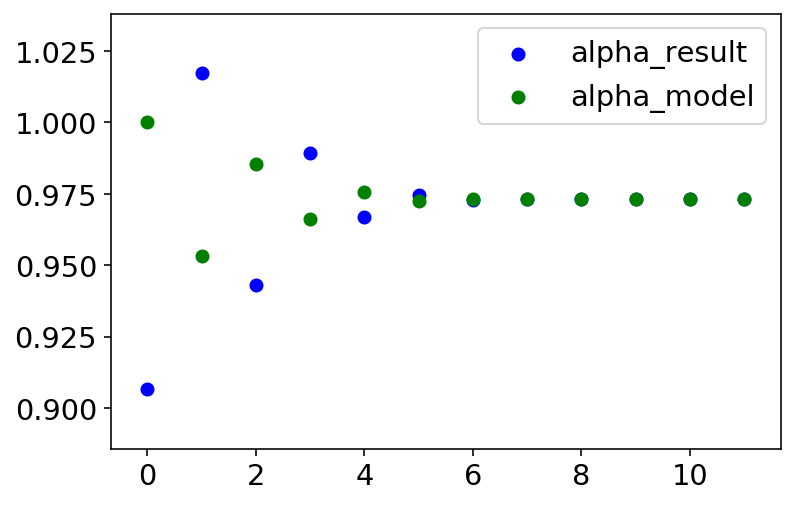

In [260]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()

alpha_result=0.97312047914784 on iteration 11


(0.9727, 0.9733)

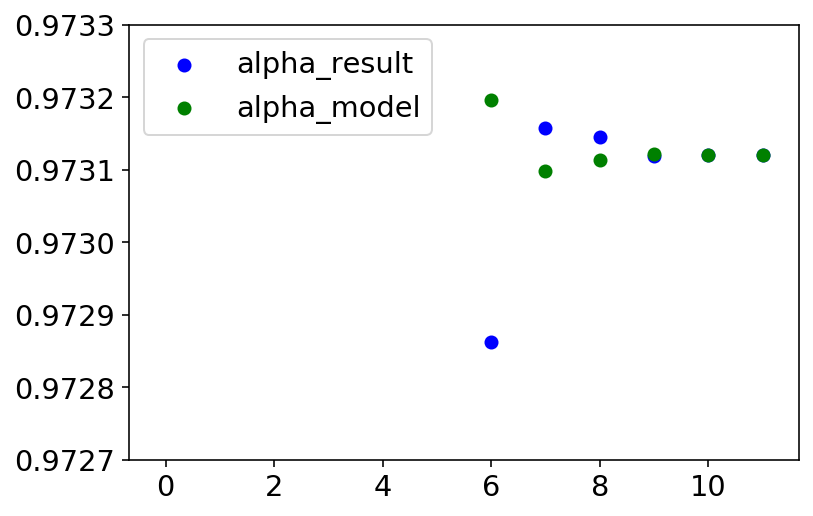

In [263]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()
plt.ylim(0.9727,0.9733)

Working quite well!!!

## Adapt eta. 

In [326]:
cat_tag = '_L750_n5e-5_z057_patchy'
cf_tag = '_baoiter_cosmob17_adapteta2'
alphas = bao_utils.get_alphas(cat_tag, cf_tag, realizations=range(30))
print(np.nanmean(alphas), np.nanmedian(alphas), np.nanstd(alphas))
print(np.where(np.isnan(alphas)))

Found 25 converged BAO cfs (5 not converged)
alpha_mean: 0.9782571031682069
alpha_median: 0.9963855258951638
alpha_std: 0.05659163037972735
0.9782571031682069 0.9963855258951638 0.05659163037972735
(array([ 3,  6, 10, 16, 18]),)


Text(0, 0.5, '#')

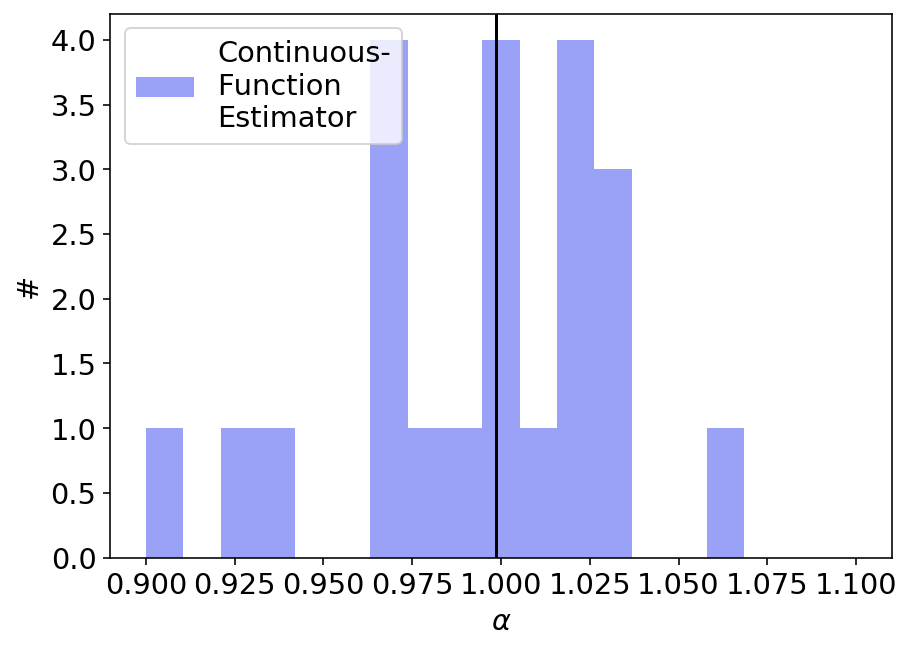

In [284]:
#bins = np.linspace(0.6, 1.4, 30)
bins = np.linspace(0.9, 1.1, 20)
plt.figure(figsize=(7,5))
plt.hist(alphas, bins=bins, color=ctopmid, alpha=0.5, label='Continuous-\nFunction\nEstimator')
#plt.hist(alphas_standard, bins=bins, color=ctheory, alpha=0.5, label='L-S with\nStandard\nBAO Fitting')
plt.axvline(alpha_true, color='black')
plt.legend(loc='upper left')
plt.xlabel(r"$\alpha$")
plt.ylabel('#')

In [295]:
cat_tag = '_L750_n5e-5_z057_patchy'
cf_tag = '_baoiter_cosmob17_adapteta2'
Nr = 18
r_arr, xi_arr, amps_arr, extra_arr, niters = load_bao(cat_tag, cf_tag, Nr)

alpha_result=0.952845304479356 on iteration 19


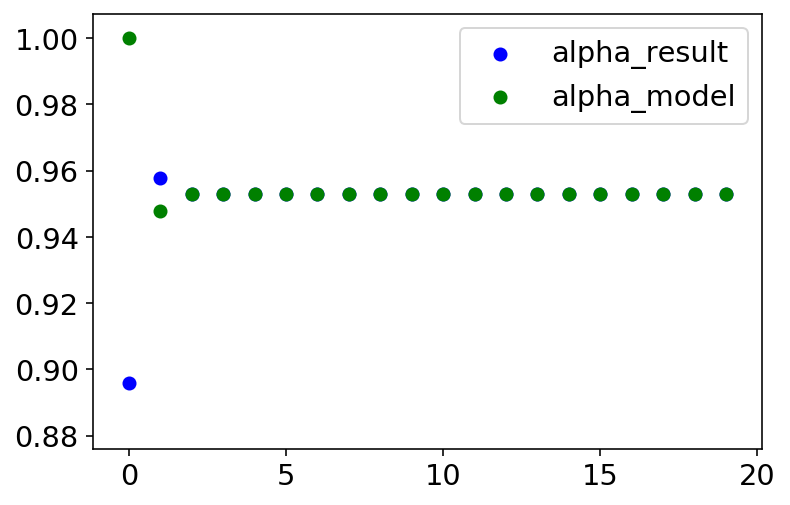

In [296]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()

alpha_result=0.952845304479356 on iteration 19


(0.9526, 0.953)

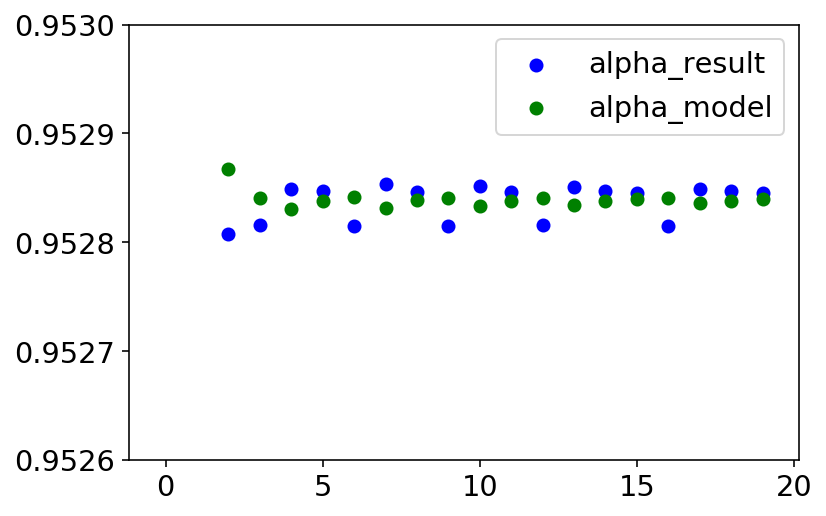

In [308]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()
#plt.ylim(0.957, 0.9586) #rlz3
plt.ylim(0.9526, 0.953)

In [309]:
for i in range(len(niters)):
    print(alpha_results[i],alpha_model[i])

0.895860826051069 1.0
0.9578042111830402 0.9479304130255345
0.9528071876725889 0.9528673121042873
0.9528157459039746 0.952840256110023
0.9528488587963457 0.9528303294765734
0.9528468711787973 0.9528378338510812
0.9528148842151488 0.9528411279570337
0.9528536523207376 0.9528315621131167
0.9528459032117038 0.9528388088057267
0.9528151061633444 0.9528409033936194
0.9528519404645285 0.9528332868903668
0.9528464644401534 0.9528382435274199
0.9528157919251061 0.9528402095459577
0.9528508653355341 0.9528343701097783
0.9528467852143138 0.952837920436683
0.9528450803103039 0.9528396376349253
0.9528153151560614 0.9528406919369036
0.9528489140380512 0.952835776194482
0.9528466400631913 0.952838066635883
0.952845304479356 0.9528394118520501


alright, let's try with a convergence threshold of 1e-5. dont need that last digit

In [328]:
cat_tag = '_L750_n5e-5_z057_patchy'
cf_tag = '_baoiter_cosmob17_adapteta3'
alphas = bao_utils.get_alphas(cat_tag, cf_tag, realizations=range(30))
print(np.nanmean(alphas), np.nanmedian(alphas), np.nanstd(alphas))
print(np.where(np.isnan(alphas)))

Found 29 converged BAO cfs (1 not converged)
alpha_mean: 0.9729864379248415
alpha_median: 0.9824665940594212
alpha_std: 0.054769648754027726
0.9729864379248415 0.9824665940594212 0.054769648754027726
(array([3]),)


In [318]:
cat_tag = '_L750_n5e-5_z057_patchy'
cf_tag = '_baoiter_cosmob17_adapteta3'
Nr = 3
r_arr, xi_arr, amps_arr, extra_arr, niters = load_bao(cat_tag, cf_tag, Nr)

alpha_result=0.9576278750866832 on iteration 19


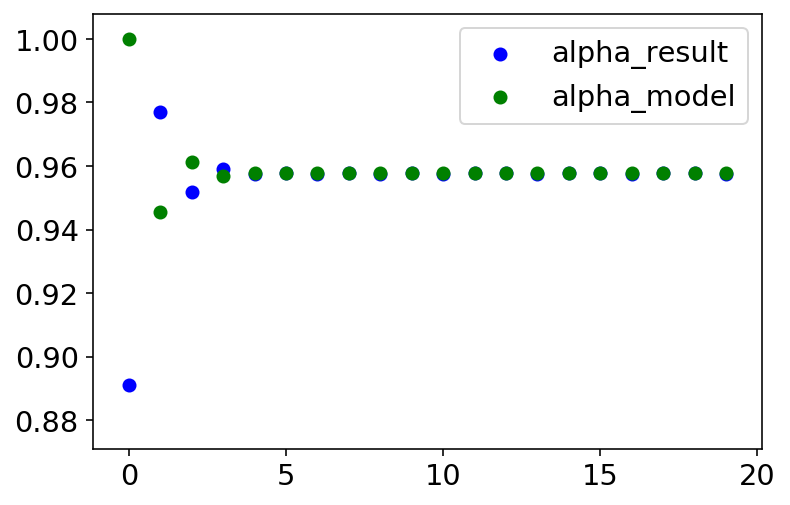

In [321]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()

alpha_result=0.9576278750866832 on iteration 19


(0.957, 0.9586)

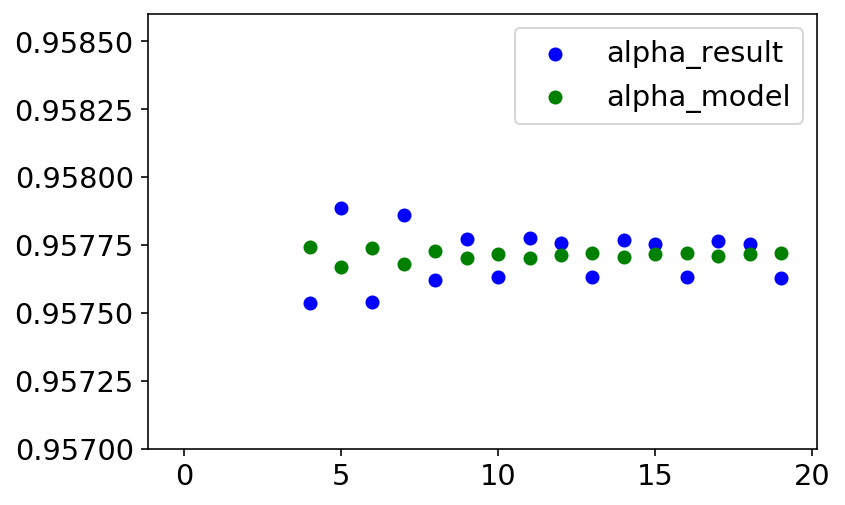

In [322]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()
plt.ylim(0.957, 0.9586) #rlz3
#plt.ylim(0.9526, 0.953)

In [335]:
cat_tag = '_L750_n2e-4_z057_patchy'
cf_tag = '_baoiter_cosmob17_adapteta3'
alphas = bao_utils.get_alphas(cat_tag, cf_tag, realizations=range(30))
print(np.nanmean(alphas), np.nanmedian(alphas), np.nanstd(alphas))
print(np.where(np.isnan(alphas)))

Found 17 converged BAO cfs (13 not converged)
alpha_mean: 0.9879216278355355
alpha_median: 0.9859251809844696
alpha_std: 0.03333318902236575
0.9879216278355355 0.9859251809844696 0.03333318902236575
(array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),)


In [342]:
cat_tag = '_L750_n2e-4_z057_patchy'
cf_tag = '_baoiter_cosmob17_adapteta3'
Nr = 18
r_arr, xi_arr, amps_arr, extra_arr, niters = load_bao(cat_tag, cf_tag, Nr)

alpha_result=1.0036529095096531 on iteration 19


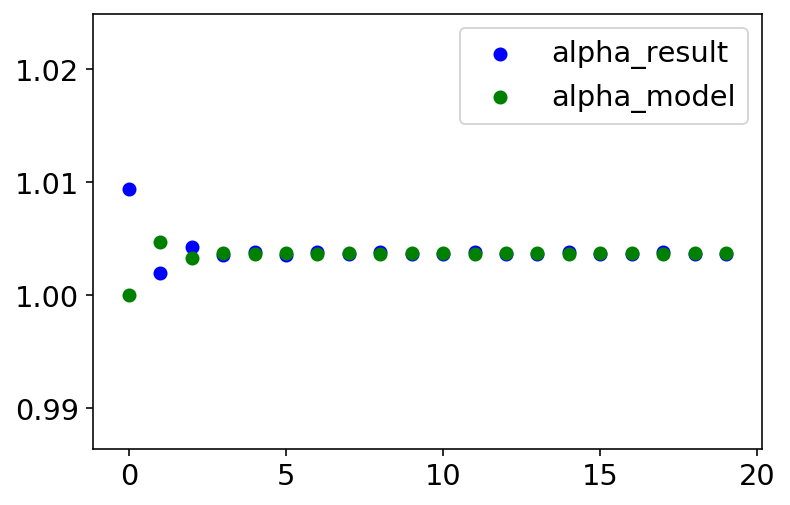

In [343]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()

alpha_result=1.0036529095096531 on iteration 19


(1.003, 1.005)

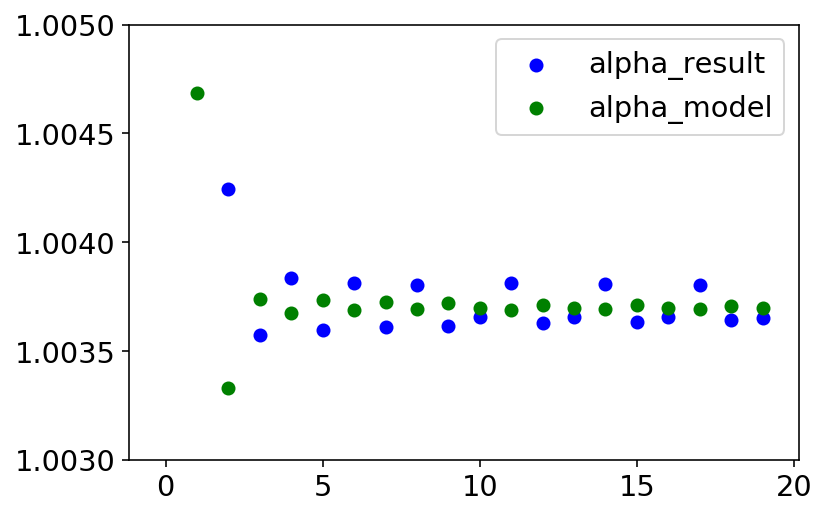

In [346]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()
plt.ylim(1.003, 1.005)

Ugh, this issue still. will it keep happening w diff patterns? St

## Check 1000 mocks

In [7]:
cat_tag = '_L750_n2e-4_z057_patchy'
cf_tag = '_baoiter_cosmob17_adaptive'
alphas = bao_utils.get_alphas(cat_tag, cf_tag, realizations=range(1000))
print(np.nanmean(alphas), np.nanmedian(alphas), np.nanstd(alphas))
print(np.where(np.isnan(alphas)))

Found 585 converged BAO cfs (415 not converged)
alpha_mean: 0.9974565632044742
alpha_median: 0.9979659966180446
alpha_std: 0.02914695298336754
0.9974565632044742 0.9979659966180446 0.02914695298336754
(array([ 17,  18,  28,  39,  43,  48,  67, 108, 115, 121, 168, 184, 225,
       239, 279, 287, 290, 307, 308, 320, 336, 343, 350, 370, 374, 379,
       380, 441, 444, 448, 484, 499, 501, 528, 529, 546, 576, 587, 599,
       604, 617, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636,
       637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649,
       650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662,
       663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675,
       676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688,
       689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701,
       702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714,
       715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727,
      

In [20]:
cat_tag = '_L750_n2e-4_z057_patchy'
cf_tag = '_baoiter_cosmob17_adaptive'
Nr = 18
r_arr, xi_arr, amps_arr, extra_arr, niters = load_bao(cat_tag, cf_tag, Nr)

alpha_result=1.0036529095094058 on iteration 19


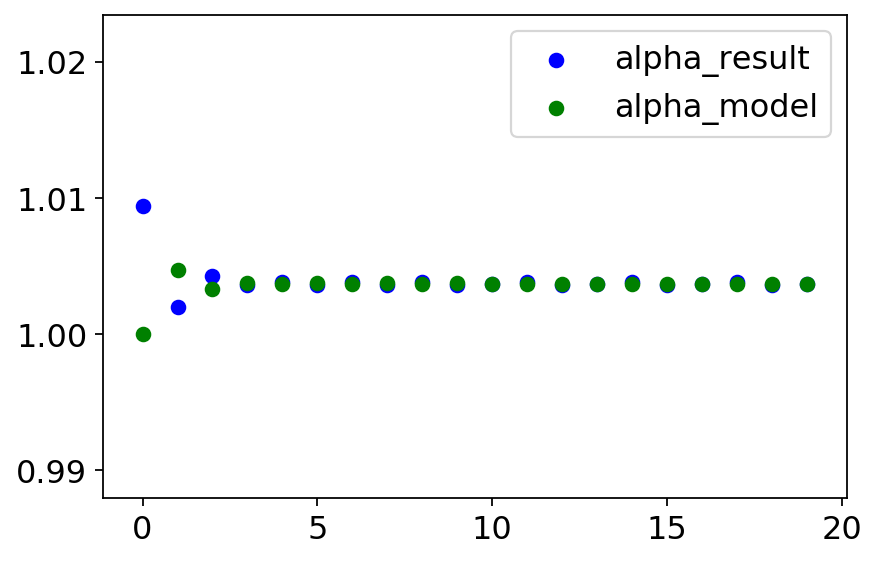

In [21]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()

alpha_result=1.0036529095094058 on iteration 19


(1.002, 1.005)

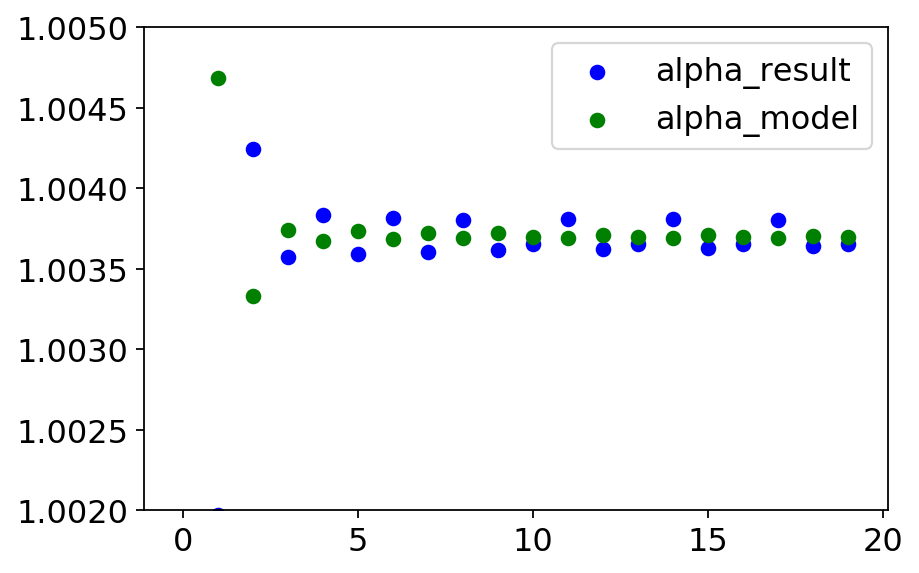

In [23]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()
plt.ylim(1.002, 1.005)

In [24]:
for i in range(len(niters)):
    print(alpha_model[i])

1.0
1.0046838484601177
1.003328752620851
1.0037406982926214
1.0036729764591041
1.0037322589856585
1.0036872803668095
1.0037244372079204
1.003693372972934
1.0037197889037088
1.0036972109274822
1.0036893133004747
1.003712678945589
1.0036975921803672
1.0036910405998416
1.0037092696147012
1.003698292729027
1.0036927559911728
1.0037069963118812
1.003699441873453


#### Let's try reducing eta by a bit more each time, 0.75 (adaptive2):

In [26]:
cat_tag = '_L750_n2e-4_z057_patchy'
cf_tag = '_baoiter_cosmob17_adaptive2'
Nr = 18
r_arr, xi_arr, amps_arr, extra_arr, niters = load_bao(cat_tag, cf_tag, Nr)

alpha_result=1.0036498653358583 on iteration 10


(1.002, 1.005)

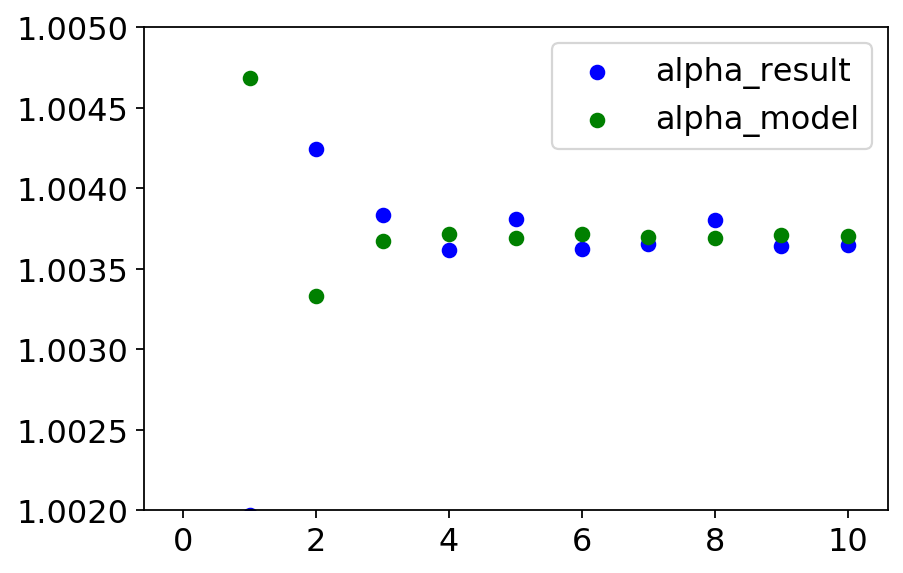

In [27]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()
plt.ylim(1.002, 1.005)

Yay that worked!

In [12]:
cat_tag = '_L750_n2e-4_z057_patchy'
cf_tag = '_baoiter_cosmob17_adaptive'
alphas = bao_utils.get_alphas(cat_tag, cf_tag, realizations=range(1000))
print(np.nanmean(alphas), np.nanmedian(alphas), np.nanstd(alphas))
print(np.where(np.isnan(alphas)))

Found 585 converged BAO cfs (415 not converged)
alpha_mean: 0.9974565632044742
alpha_median: 0.9979659966180446
alpha_std: 0.02914695298336754
0.9974565632044742 0.9979659966180446 0.02914695298336754
(array([ 17,  18,  28,  39,  43,  48,  67, 108, 115, 121, 168, 184, 225,
       239, 279, 287, 290, 307, 308, 320, 336, 343, 350, 370, 374, 379,
       380, 441, 444, 448, 484, 499, 501, 528, 529, 546, 576, 587, 599,
       604, 617, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636,
       637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649,
       650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662,
       663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675,
       676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688,
       689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701,
       702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714,
       715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727,
      

In [16]:
cat_tag = '_L750_n2e-4_z057_patchy'
cf_tag = '_baoiter_cosmob17_adaptive2'
alphas = bao_utils.get_alphas(cat_tag, cf_tag, realizations=range(1000))
print(np.nanmean(alphas), np.nanmedian(alphas), np.nanstd(alphas))
print(np.where(np.isnan(alphas)))

Found 968 converged BAO cfs (32 not converged)
alpha_mean: 0.9975571633052617
alpha_median: 0.9979789368922081
alpha_std: 0.029545894242728857
0.9975571633052617 0.9979789368922081 0.029545894242728857
(array([ 28,  39,  43,  48, 108, 121, 184, 223, 225, 279, 287, 320, 336,
       350, 370, 374, 379, 441, 444, 448, 484, 499, 529, 576, 599, 604,
       624, 713, 776, 908, 919, 924]),)


Oh wow! Changing this eta really helped. Let's check out the other mocks:

In [11]:
cat_tag = '_L750_n1e-4_z057_patchy'
cf_tag = '_baoiter_cosmob17_adaptive'
alphas = bao_utils.get_alphas(cat_tag, cf_tag, realizations=range(1000))
print(np.nanmean(alphas), np.nanmedian(alphas), np.nanstd(alphas))
print(np.where(np.isnan(alphas)))

Found 936 converged BAO cfs (64 not converged)
alpha_mean: 0.9959307209296173
alpha_median: 0.9963303943048596
alpha_std: 0.04087141578153448
0.9959307209296173 0.9963303943048596 0.04087141578153448
(array([  4,  10,  37,  38,  48,  62, 112, 121, 125, 151, 153, 165, 181,
       184, 190, 217, 238, 244, 279, 312, 316, 318, 322, 326, 331, 355,
       387, 392, 402, 433, 442, 455, 487, 497, 504, 516, 585, 606, 674,
       691, 709, 742, 744, 756, 760, 780, 783, 793, 814, 819, 822, 852,
       876, 879, 882, 888, 895, 915, 924, 929, 939, 955, 957, 979]),)


In [29]:
cat_tag = '_L750_n1e-4_z057_patchy'
cf_tag = '_baoiter_cosmob17_adaptive2'
alphas = bao_utils.get_alphqas(cat_tag, cf_tag, realizations=range(1000))
print(np.nanmean(alphas), np.nanmedian(alphas), np.nanstd(alphas))
print(np.where(np.isnan(alphas)))

Found 961 converged BAO cfs (39 not converged)
alpha_mean: 0.9966566850688311
alpha_median: 0.9968588474804749
alpha_std: 0.04121643940082187
0.9966566850688311 0.9968588474804749 0.04121643940082187
(array([  4,   7,  37,  38,  62, 112, 121, 151, 184, 244, 279, 318, 322,
       355, 387, 392, 402, 433, 455, 487, 497, 516, 585, 606, 674, 691,
       709, 756, 760, 780, 783, 793, 819, 872, 876, 879, 882, 924, 929]),)


In [8]:
cat_tag = '_L750_n5e-5_z057_patchy'
cf_tag = '_baoiter_cosmob17_adaptive'
alphas = bao_utils.get_alphas(cat_tag, cf_tag, realizations=range(1000))
print(np.nanmean(alphas), np.nanmedian(alphas), np.nanstd(alphas))
print(np.where(np.isnan(alphas)))

Found 0 converged BAO cfs (1000 not converged)
alpha_mean: nan
alpha_median: nan
alpha_std: nan
nan nan nan
(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 

/home/users/ksf293/continuous-estimator/code/bao_utils.py:187: RuntimeWarning: Mean of empty slice
  print("alpha_mean:", np.nanmean(alphas))
/home/users/ksf293/miniconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/home/users/ksf293/miniconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/users/ksf293/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


Alright, we got a singular one here. The amplitudes just jumped to wild numbers one iteration, not clear why. need some bounds so this doesn't happen / kick it back on track.... not sure what this would be!

In [14]:
cat_tag = '_L750_n5e-5_z057_patchy'
cf_tag = '_baoiter_cosmob17_adaptive2'
alphas = bao_utils.get_alphas(cat_tag, cf_tag, realizations=range(1000))
print(np.nanmean(alphas), np.nanmedian(alphas), np.nanstd(alphas))
print(np.where(np.isnan(alphas)))

Found 936 converged BAO cfs (64 not converged)
alpha_mean: 0.9955669092558557
alpha_median: 0.9969550729033037
alpha_std: 0.06528816483499683
0.9955669092558557 0.9969550729033037 0.06528816483499683
(array([ 47,  65,  66,  81, 106, 118, 146, 148, 157, 163, 186, 192, 203,
       236, 252, 282, 315, 319, 322, 323, 342, 362, 369, 395, 412, 414,
       442, 447, 453, 519, 520, 526, 529, 569, 584, 585, 594, 604, 610,
       627, 659, 679, 680, 693, 698, 738, 748, 771, 775, 776, 786, 793,
       805, 846, 894, 902, 917, 920, 935, 946, 953, 957, 971, 996]),)


### checking the unconverged ones here:

In [22]:
cat_tag = '_L750_n2e-4_z057_patchy'
cf_tag = '_baoiter_cosmob17_adaptive2'
Nr = 43
r_arr, xi_arr, amps_arr, extra_arr, niters = load_bao(cat_tag, cf_tag, Nr)

alpha_result=0.8671688543100783 on iteration 19


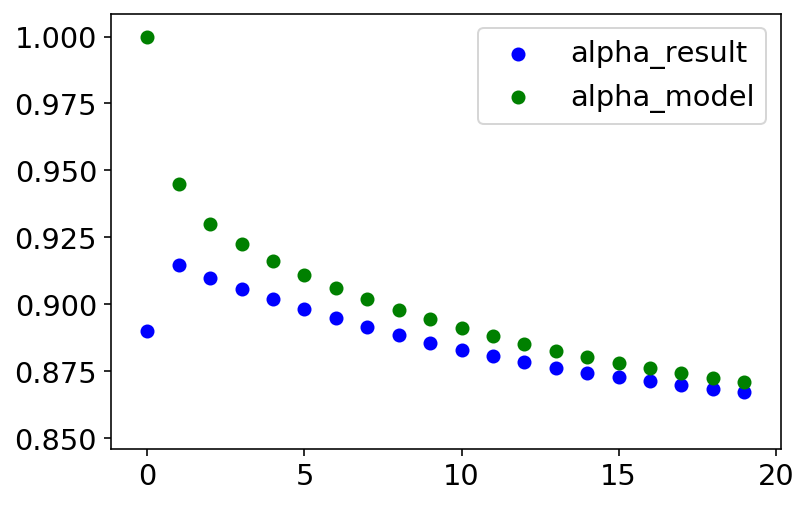

In [23]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()
#plt.ylim(1.002, 1.005)

In [26]:
cat_tag = '_L750_n5e-5_z057_patchy'
cf_tag = '_baoiter_cosmob17_adaptive2'
Nr = 971
r_arr, xi_arr, amps_arr, extra_arr, niters = load_bao(cat_tag, cf_tag, Nr)

alpha_result=0.867549833040247 on iteration 19


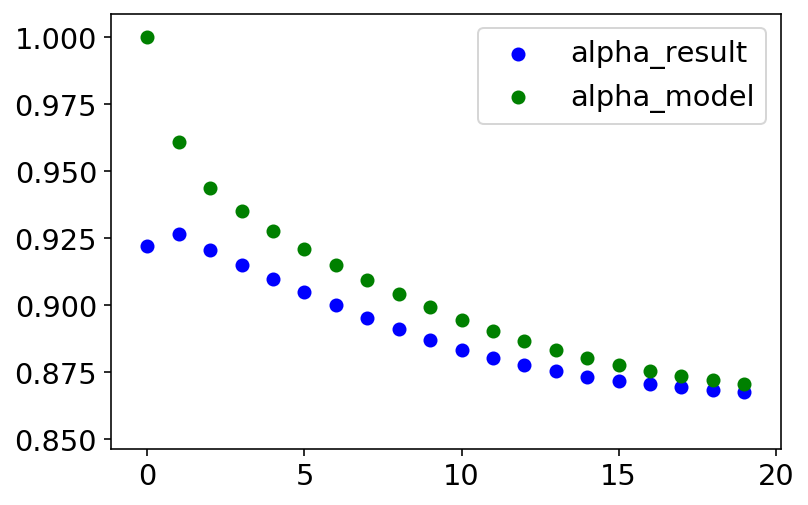

In [27]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()
#plt.ylim(1.002, 1.005)

They look like mostly just havent converged yet but are on their way! As opposed to caught in loops. Just run more iterations!

### more iterations

In [15]:
cat_tag = '_L750_n5e-5_z057_patchy'
cf_tag = '_baoiter_cosmob17_adaptive2'
alphas = bao_utils.get_alphas(cat_tag, cf_tag, realizations=range(1000))
print(np.nanmean(alphas), np.nanmedian(alphas), np.nanstd(alphas))
print(np.where(np.isnan(alphas)))

163 1.6468522588966883
Found 994 converged BAO cfs (6 not converged)
alpha_mean: 0.9949861673888267
alpha_median: 0.9958969710909811
alpha_std: 0.07771842274126549
0.9949861673888267 0.9958969710909811 0.07771842274126549
(array([ 81, 203, 282, 453, 584, 996]),)


In [16]:
cat_tag = '_L750_n1e-4_z057_patchy'
cf_tag = '_baoiter_cosmob17_adaptive2'
alphas = bao_utils.get_alphas(cat_tag, cf_tag, realizations=range(1000))
print(np.nanmean(alphas), np.nanmedian(alphas), np.nanstd(alphas))
print(np.where(np.isnan(alphas)))

Found 990 converged BAO cfs (10 not converged)
alpha_mean: 0.9949224700886425
alpha_median: 0.9962935957528727
alpha_std: 0.04815234888205728
0.9949224700886425 0.9962935957528727 0.04815234888205728
(array([244, 279, 387, 455, 585, 691, 780, 783, 793, 876]),)


In [8]:
cat_tag = '_L750_n2e-4_z057_patchy'
cf_tag = '_baoiter_cosmob17_adaptive2'
alphas = bao_utils.get_alphas(cat_tag, cf_tag, realizations=range(1000))
print(np.nanmean(alphas), np.nanmedian(alphas), np.nanstd(alphas))
print(np.where(np.isnan(alphas)))

776 1.5351744197464345
Found 990 converged BAO cfs (10 not converged)
alpha_mean: 0.9965899038381969
alpha_median: 0.9977577547739293
alpha_std: 0.03716707184483621
0.9965899038381969 0.9977577547739293 0.03716707184483621
(array([ 43,  48, 108, 184, 336, 379, 484, 499, 604, 908]),)


In [9]:
cat_tag = '_L750_n2e-4_z057_patchy'
cf_tag = '_baoiter_cosmob17_adaptive2'
Nr = 43
r_arr, xi_arr, amps_arr, extra_arr, niters = load_bao(cat_tag, cf_tag, Nr)

alpha_result=0.8584236585482179 on iteration 39


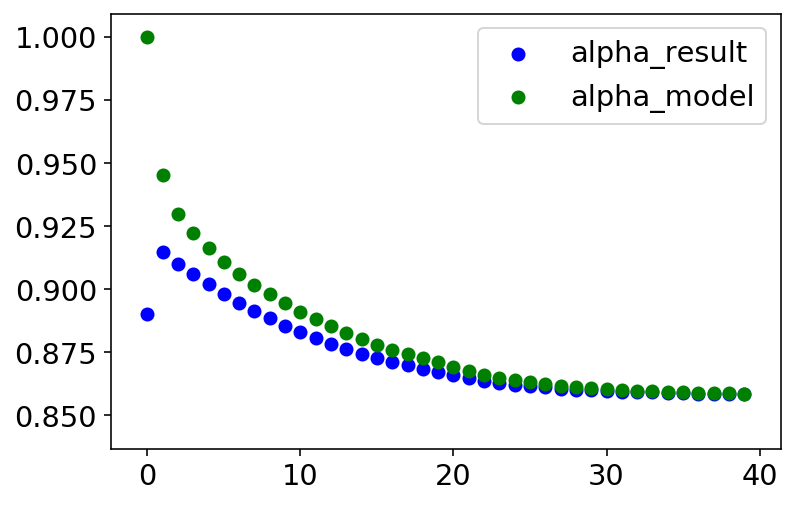

In [10]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()

alpha_result=0.8584236585482179 on iteration 39


(30, 40)

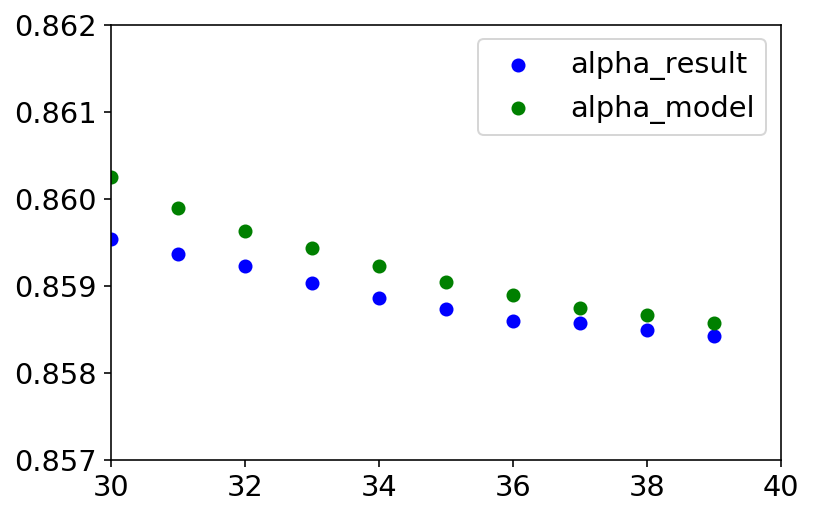

In [12]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()
plt.ylim(0.857,0.862)
plt.xlim(30,40)

### up to niter=60!

In [24]:
cat_tag = '_L750_n5e-5_z057_patchy'
cf_tag = '_baoiter_cosmob17_adaptive2'
alphas = bao_utils.get_alphas(cat_tag, cf_tag, realizations=range(1000))
print(np.nanmean(alphas), np.nanmedian(alphas), np.nanstd(alphas))
print(np.where(np.isnan(alphas)))

163 1.6468522588966883
Found 999 converged BAO cfs (1 not converged)
alpha_mean: 0.9946407462804735
alpha_median: 0.9952113370965481
alpha_std: 0.07981796555129103
0.9946407462804735 0.9952113370965481 0.07981796555129103
(array([81]),)


In [25]:
cat_tag = '_L750_n1e-4_z057_patchy'
cf_tag = '_baoiter_cosmob17_adaptive2'
alphas = bao_utils.get_alphas(cat_tag, cf_tag, realizations=range(1000))
print(np.nanmean(alphas), np.nanmedian(alphas), np.nanstd(alphas))
print(np.where(np.isnan(alphas)))

Found 999 converged BAO cfs (1 not converged)
alpha_mean: 0.9938003301309872
alpha_median: 0.9960857569357021
alpha_std: 0.050239919961490256
0.9938003301309872 0.9960857569357021 0.050239919961490256
(array([279]),)


In [26]:
cat_tag = '_L750_n2e-4_z057_patchy'
cf_tag = '_baoiter_cosmob17_adaptive2'
alphas = bao_utils.get_alphas(cat_tag, cf_tag, realizations=range(1000))
print(np.nanmean(alphas), np.nanmedian(alphas), np.nanstd(alphas))
print(np.where(np.isnan(alphas)))

776 1.5351744197464345
Found 999 converged BAO cfs (1 not converged)
alpha_mean: 0.9947941461741352
alpha_median: 0.997467272060511
alpha_std: 0.0421135535173505
0.9947941461741352 0.997467272060511 0.0421135535173505
(array([184]),)


In [20]:
cat_tag = '_L750_n2e-4_z057_patchy'
cf_tag = '_baoiter_cosmob17_adaptive2'
Nr = 48
r_arr, xi_arr, amps_arr, extra_arr, niters = load_bao(cat_tag, cf_tag, Nr)

alpha_result=0.9036664530528427 on iteration 59


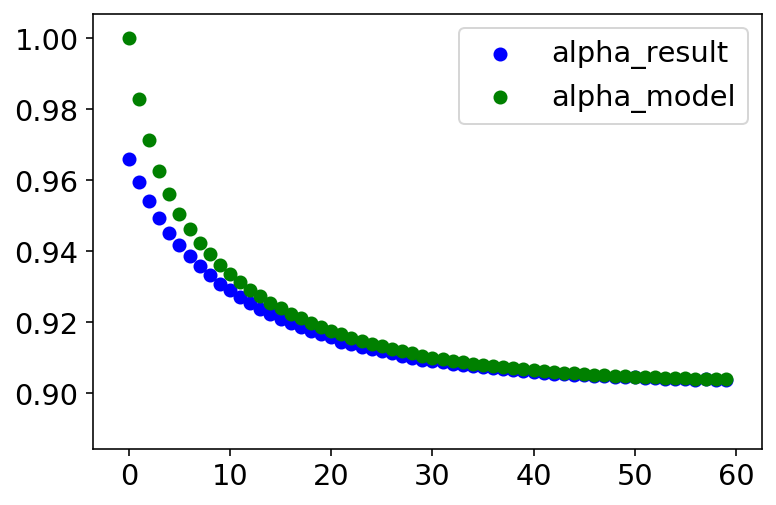

In [21]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()
#plt.ylim(0.857,0.862)
#plt.xlim(30,40)

In [29]:
cat_tag = '_L750_n2e-4_z057_patchy'
cf_tag = '_baoiter_cosmob17_adaptive2'
Nr = 184
r_arr, xi_arr, amps_arr, extra_arr, niters = load_bao(cat_tag, cf_tag, Nr)

alpha_result=0.8070331661381498 on iteration 135


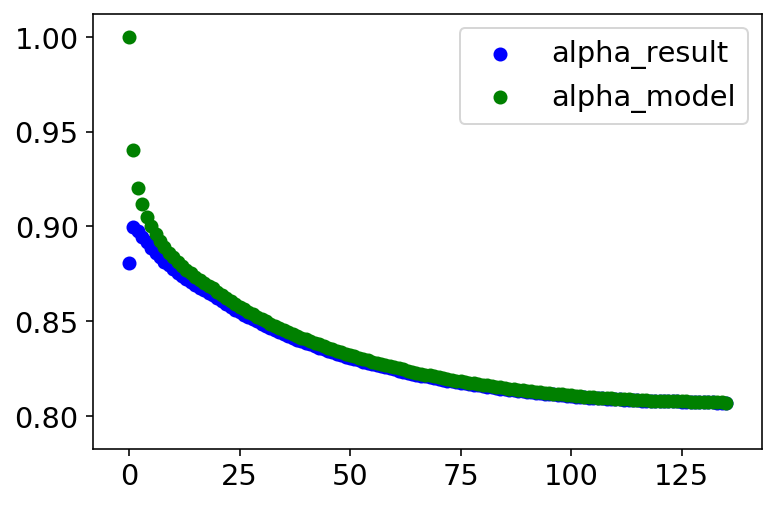

In [30]:
alpha_results = [extra_arr[n]['alpha_result'] for n in range(len(niters))]
alpha_model = [extra_arr[n]['alpha_model'] for n in range(len(niters))]
print(f"alpha_result={alpha_results[-1]} on iteration {niters[-1]}")

plt.figure()
plt.scatter(niters, alpha_results, color='blue', label='alpha_result')
plt.scatter(niters, alpha_model, color='green', label='alpha_model')
plt.legend()
#plt.ylim(0.857,0.862)
#plt.xlim(30,40)